# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

#Introducción

El presente proyecto tiene como finalidad abordar la implementación y optimización de una red neuronal convolucional (CNN) destinada a resolver un problema de clasificación de imágenes, específicamente utilizando un conjunto de datos compuesto por fotografías de personajes de la serie animada "Los Simpson". El desafío principal radica en la identificación precisa y automática del personaje presente en cada imagen proporcionada, lo cual es un problema típico y relevante en el ámbito de la visión artificial y reconocimiento de patrones mediante técnicas avanzadas de Deep Learning.

##Descripción del problema

El problema planteado consiste en clasificar automáticamente imágenes provenientes del set de datos "Simpsons", que contiene múltiples fotografías de diversos personajes de la popular serie animada. La complejidad del problema radica en la variabilidad visual significativa dentro de cada clase, debido a diferentes poses, expresiones faciales, vestimentas, iluminación y fondos. Esto implica un desafío considerable para el modelo CNN, que debe ser suficientemente flexible y potente para aprender representaciones efectivas que permitan identificar correctamente cada personaje a partir de las características visuales extraídas automáticamente por las capas convolucionales. La solución propuesta deberá considerar la selección adecuada de herramientas tecnológicas, justificación de la arquitectura utilizada y optimización rigurosa de hiperparámetros para garantizar una alta efectividad en las tareas de clasificación.

##Objetivo del modelo

El objetivo general del es desarrollar y entrenar una red neuronal convolucional que sea capaz de clasificar con alta precisión las imágenes de distintos personajes del conjunto de datos de Los Simpson.

#Carga y preprocesamiento de datos

# Descarga de la data

La preparación de los datos y la definición de las arquitecturas de las redes neuronales constituyeron etapas fundamentales en este proyecto de clasificación de imágenes de los Simpsons. La metodología aplicada se fundamenta en las características de las redes convolucionales y en las mejores prácticas del aprendizaje profundo.

En primer lugar, se procedió a la descarga de los datos, se utilizan comandos `!wget` para descargar dos archivos: `simpsons_train.tar.gz` y `simpsons_test.tar.gz`. Estos archivos se obtienen de enlaces específicos y se guardan con los nombres especificados (-O). Posteriormente, se emplea el comando `!tar -xzvf` para descomprimir ambos archivos. La extensión `.tar.gz` indica que son archivos comprimidos (`gzip`) y empaquetados (`tarball`). La descompresión es un paso necesario para acceder a las imágenes contenidas en su interior y prepararlas para la carga en memoria y el procesamiento.

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-18 01:03:37--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f0c601a8f7b186eb98e20d214.dl.dropboxusercontent.com/cd/0/inline/Cp7YfPiutL_RiaTicbi2NUbL2md9BJocIjCPYuy1dwkNxUTDONYUOND2B7A4qgjebQf_TFw3ISrpJsv1QmpZbnCl7GQP4YZV3e_r6Um9C6xjZn5I6HBL4bm_Pmpjidp3WtL8V2qsGMx-oaGQxFwyDiQw/file# [following]
--2025-05-18 01:03:38--  https://uc0f0c601a8f7b186eb98e20d214.dl.dropboxusercontent.com/cd/0/inline/Cp7YfPiutL_RiaTicbi2NUbL2md9BJocIjCPYuy1dwkNxUTDONYUOND2B7A4qgjebQf_TFw3ISrpJsv1QmpZbnCl7GQP4YZV3e_r6Um9C6xjZn5I6HBL4bm_Pmpjidp3WtL8V2qsGMx-oaGQxFwyDiQw/file
Resolving uc0f0c601a8f7b186eb98e20d214.dl.dropboxusercontent.com (uc0f0c601a8f7b186eb98e20d214.dl.dropboxusercontent.com)... 162.125.5.1

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-18 01:03:48--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucce85a4ffcb835dd479b4f39021.dl.dropboxusercontent.com/cd/0/inline/Cp4GpjEnVrYUkre-JqGdQaXjI3jRIsoqkoVjKBUSLnpSd0o82z8gPd18QADKTBO9ynyXEPHHexNKle0roLuIbdPMErL4ov9MvR8J0xKlgD6smxcsxSC6dxCPmK-R6ex0xiVUJffdutuQ-rfMT9HdEl7H/file# [following]
--2025-05-18 01:03:49--  https://ucce85a4ffcb835dd479b4f39021.dl.dropboxusercontent.com/cd/0/inline/Cp4GpjEnVrYUkre-JqGdQaXjI3jRIsoqkoVjKBUSLnpSd0o82z8gPd18QADKTBO9ynyXEPHHexNKle0roLuIbdPMErL4ov9MvR8J0xKlgD6smxcsxSC6dxCPmK-R6ex0xiVUJffdutuQ-rfMT9HdEl7H/file
Resolving ucce85a4ffcb835dd479b4f39021.dl.dropboxusercontent.com (ucce85a4ffcb835dd479b4f39021.dl.dropboxusercontent.com)... 162.125.5.15

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

In [ ]:
# Standard library imports
import collections
import glob
import itertools
import os

# OpenCV
import cv2
from google.colab.patches import cv2_imshow

# Visualization
import matplotlib
import matplotlib.pyplot as plt

# Numerical / Data handling
import numpy as np
import pandas as pd

# TensorFlow / Keras
import tensorflow as tf
import keras
from tensorflow.keras import Input, Sequential, layers, backend
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    RandomContrast,
    RandomFlip,
    RandomRotation,
    RandomTranslation,
    RandomZoom,
)
from tensorflow.keras.optimizers import Adam, Adadelta, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Jupyter magic
%matplotlib inline

 Se definen las funciones clave para la ingesta de los datos. La función `load_train_set` itera a través de los directorios de personajes en el conjunto de entrenamiento y carga cada imagen `.jpg`. Un aspecto crucial es el uso de `cv2.resize` para estandarizar el tamaño de todas las imágenes al definido por `IMG_SIZE` (`64x64 píxeles`), resolviendo el problema de tamaños de imagen variables en el dataset original. Las imágenes redimensionadas se almacenan en `X_train` y sus correspondientes etiquetas numéricas en `y_train`. La función `load_test_set` realiza una operación similar para el conjunto de prueba, extrayendo el nombre del personaje del nombre del archivo para asignar la etiqueta correcta antes de redimensionar y almacenar las imágenes y etiquetas en `X_test` y `y_test`.

In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

Posterior a ello, se definen dos constantes importantes para el proyecto. `MAP_CHARACTERS` es un diccionario que establece un mapeo entre los índices numéricos de las clases (`0` a `17`) y los nombres de los 18 personajes de los Simpsons que se utilizarán para la clasificación. Este mapeo es esencial para interpretar las predicciones numéricas del modelo en términos de los personajes reales. `IMG_SIZE` define la dimensión a la cual todas las imágenes serán redimensionadas (`64x64 píxeles`). Esta estandarización del tamaño es un requisito fundamental para la entrada a las redes neuronales convolucionales que se construirán posteriormente.

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

 Luego, se definen las rutas a los directorios donde se encuentran las imágenes descomprimidas para entrenamiento (`DATASET_TRAIN_PATH_COLAB`) y prueba (`DATASET_TEST_PATH_COLAB`). Posteriormente, se invocan las funciones `load_train_set` y `load_test_set` previamente definidas, pasando estas rutas y el diccionario `MAP_CHARACTERS`. Como resultado de la ejecución de estas funciones, las imágenes (ya redimensionadas a `IMG_SIZE`) y sus etiquetas correspondientes se cargan en memoria y se almacenan en los arrays de `NumPy` `X` y `y` para el conjunto de entrenamiento, y `X_test` y `y_test` para el conjunto de prueba. Este paso consolida los datos preprocesados (`redimensionados`) en estructuras listas para ser divididas y utilizadas en el entrenamiento y evaluación de los modelos.

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Tras la ejecución de las funciones de carga, se puede observar la distribución de imágenes por personaje en el conjunto de entrenamiento y el tamaño del conjunto de prueba. Se identifica claramente una importante desproporción en el número de imágenes disponibles para cada clase. Personajes como `homer_simpson`, `bart_simpson`, `lisa_simpson`, `moe_szyslak` y `ned_flanders` cuentan con una cantidad considerablemente mayor de ejemplos en comparación con otros como `nelson_muntz`, `edna_krabappel` o `comic_book_guy`. Esta variabilidad en el tamaño de las clases es una característica fundamental de este dataset. Interpretar esta distribución es crucial, ya que un mayor número de ejemplos por clase generalmente facilita el aprendizaje del modelo para esa categoría, mientras que las clases con menos imágenes pueden representar un mayor desafío para lograr una alta precisión. Esta observación sobre la desbalance de clases influirá en el análisis posterior de los resultados del modelo, especialmente al evaluar el rendimiento por cada personaje individual. El conjunto de prueba consta de 890 imágenes listas para ser utilizadas en la evaluación final.

Posteriormente, se realiza el barajado aleatorio y la división de datos. En primer lugar, se realiza el barajado aleatorio del conjunto de entrenamiento original (`X`, `y`). Esto se consigue generando una permutación aleatoria de los índices utilizando `np.random.permutation` y aplicándola a ambos arrays. El propósito de este barajado es crucial para asegurar que, al dividir los datos posteriormente, la distribución de las clases (`personajes`) sea lo más uniforme posible en los conjuntos resultantes.

In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

## Separación de la data

Luego del barajado, se procede a la separación de los datos utilizando `train_test_split`. El conjunto de entrenamiento barajado (`X`, `y`) se divide en un `80%` para el entrenamiento efectivo (`X_train`, `y_train`) y un `20%` para la validación durante el entrenamiento (`X_val`, `y_val`), utilizando `test_size=0.2`. El conjunto de prueba (`X_test`, `y_test`) ya fue cargado por separado y no se modifica en esta división. Se imprime información detallada sobre el número de elementos y las dimensiones de cada conjunto para verificar que la división se realizó correctamente. Esta separación en tres conjuntos (entrenamiento, validación y prueba) es fundamental para un proceso de modelado y evaluación riguroso.


 Finalmente, se imprime esta información detallada sobre el tamaño y las dimensiones de cada conjunto para verificar que la división se realizó correctamente y que los datos están preparados con las formas esperadas para la entrada a los modelos. Esta separación en tres conjuntos (entrenamiento, validación y prueba) es fundamental para un proceso de modelado y evaluación riguroso, permitiendo monitorear el rendimiento durante el entrenamiento y obtener una evaluación final imparcial.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


El conjunto de datos utilizado para el entrenamiento del modelo está compuesto por imágenes de dimensiones `(64, 64, 3)`, donde el valor `3` corresponde a los tres canales de color (RGB). En cuanto a la distribución de las imágenes, el conjunto de entrenamiento (`X_train`) contiene un total de 15,193 imágenes, mientras que el conjunto de validación (`X_val`) está conformado por 3,799 imágenes. Finalmente, el conjunto de prueba (`X_test`) cuenta con 890 imágenes. Esta distribución garantiza que el modelo disponga de suficientes datos para aprender, validar su desempeño y ser evaluado de manera objetiva en datos no vistos.


## Visualización de las imágenes

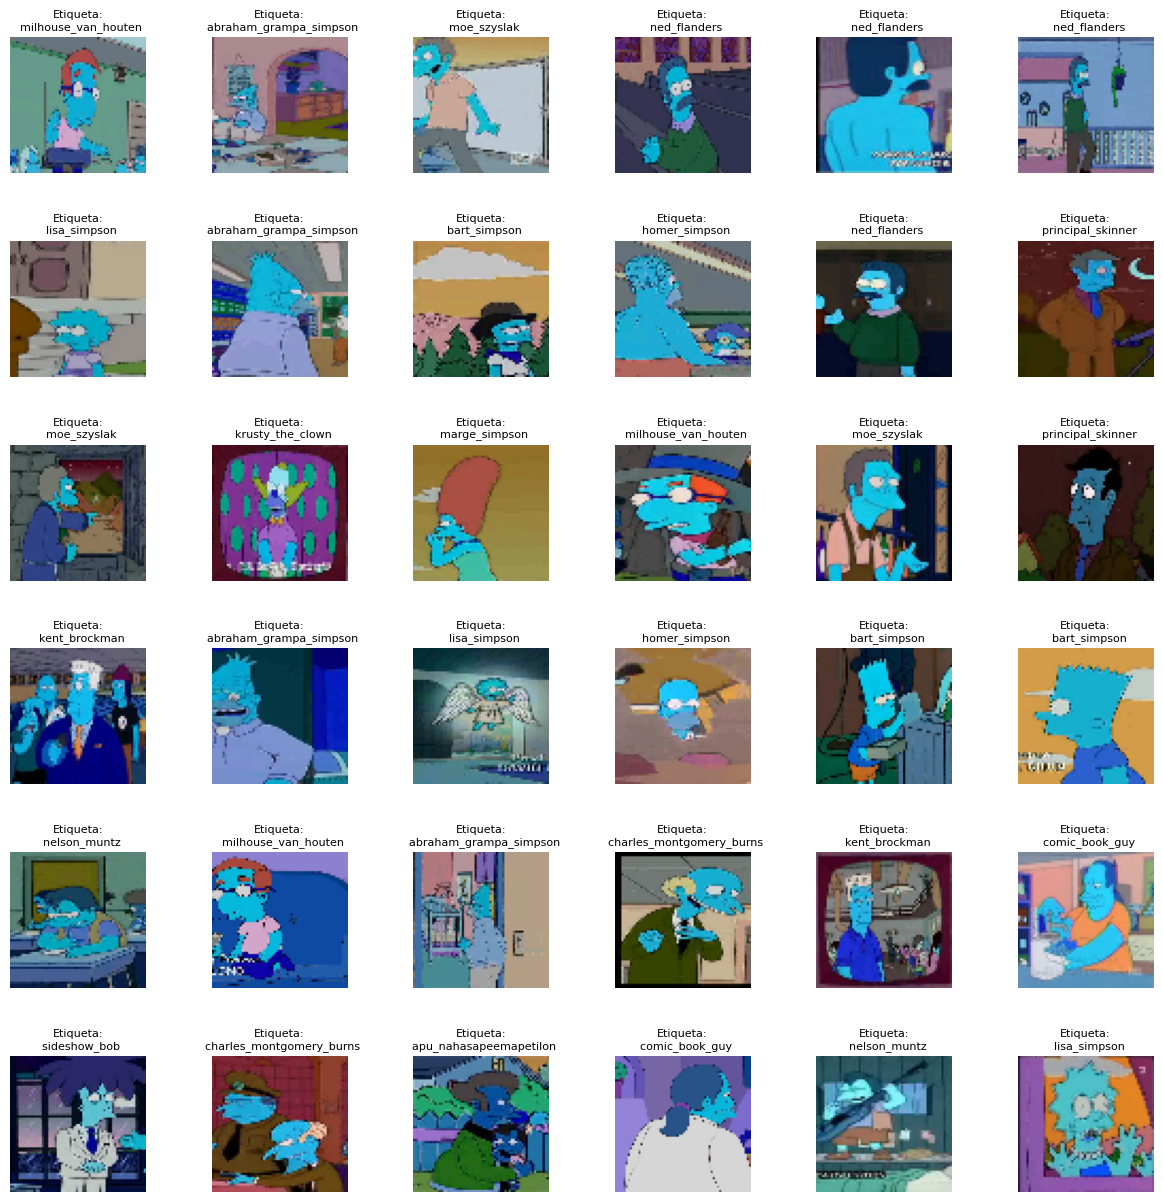

In [ ]:
def plot_random_training_images_grid(X_train, y_train, class_names=None, num_rows=6, num_cols=6, figsize=(10,10)):
    """
    Muestra una grilla de imágenes aleatorias del conjunto de entrenamiento con sus etiquetas verdaderas.

    Parámetros:
    -----------
    X_train : array-like
        Array de imágenes de entrenamiento (forma: [n_muestras, altura, ancho, canales]).
    y_train : array-like
        Etiquetas verdaderas para las imágenes de entrenamiento, como enteros o one-hot.
    class_names : list of str o None
        Nombres de las clases indexadas por la etiqueta. Si es None, se usan las etiquetas numéricas.
    num_rows : int
        Número de filas en la grilla.
    num_cols : int
        Número de columnas en la grilla.
    figsize : tuple
        Tamaño de la figura para el plot.
    """
    plt.figure(figsize=figsize)
    total = num_rows * num_cols
    for i in range(total):
        ax = plt.subplot(num_rows, num_cols, i+1)
        # Seleccionar un índice aleatorio
        ex = np.random.randint(len(X_train))

        # Obtener la imagen y la etiqueta verdadera
        img = X_train[ex]
        true_label_idx = np.argmax(y_train[ex]) if y_train.ndim > 1 and y_train.shape[1] > 1 else y_train[ex]

        # Construir el título con la etiqueta verdadera
        true_label = class_names[true_label_idx] if class_names else str(true_label_idx)
        title = f"Etiqueta:\n  {true_label}"

        # Mostrar la imagen
        # Handle grayscale images
        if img.ndim == 3 and img.shape[2] == 1:
            ax.imshow(img.squeeze(-1), cmap='gray')
        else:
            ax.imshow(img)

        ax.set_title(title, fontsize=8)
        ax.axis('off')
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

# Ejecutar la función para mostrar la grilla
plot_random_training_images_grid(X_train, y_train, MAP_CHARACTERS, figsize=(15,15))

Para obtener una comprensión visual de la naturaleza del conjunto de datos de entrenamiento tal como se cargó y dividió, se emplea la función `plot_random_training_images_grid` para visualizar aleatoriamente una grilla de imágenes. Cada imagen mostrada proviene del conjunto de entrenamiento y está acompañada por su etiqueta verdadera, identificando al personaje de los Simpsons correspondiente. Estas imágenes, ya redimensionadas a `64x64 píxeles`, representan los ejemplos con los que se iniciará el procesamiento. Observar esta muestra permite apreciar la variabilidad en las poses, vestimenta, expresiones y calidad de las imágenes dentro de cada clase antes de aplicar transformaciones adicionales.

## Normalización

In [ ]:
# Normalización
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Normalización
y_train = tf.keras.utils.to_categorical(y_train, num_categ)
y_val = tf.keras.utils.to_categorical(y_val, num_categ)
y_test = tf.keras.utils.to_categorical(y_test, num_categ)

Tras la división de los datos y una inspección visual inicial, se procede a la normalización de los valores de píxeles y a la codificación de las etiquetas. Los valores de intensidad de los píxeles en los conjuntos de imágenes (`X_train`, `X_val`, `X_test`), que se encontraban en el rango de `0` a `255`, se convierten a tipo flotante y se dividen por `255.0`. Esto escala los valores al rango [`0`, `1`], una práctica estándar en el preprocesamiento de imágenes para redes neuronales que contribuye a una convergencia más rápida y estable del proceso de entrenamiento. Paralelamente, las etiquetas numéricas de los conjuntos de entrenamiento, validación y prueba (`y_train`, `y_val`, `y_test`) se transforman al formato `one-hot encoding` utilizando `tf.keras.utils.to_categorical`. En este formato, cada etiqueta se representa como un vector binario donde solo el índice correspondiente a la clase correcta tiene un valor de 1. Este formato es necesario para la correcta aplicación de la función de pérdida

# Estrategia de experimentación y funciones de ayuda

## Estrategia

Para abordar el problema de clasificación, se optó por una estrategia experimental centrada en la búsqueda del mejor rendimiento posible del modelo. Inicialmente, se tomó como referencia la arquitectura base del modelo denominado `modelo1`, cuya configuración específica se detallará más adelante. A diferencia del enfoque tradicional donde se modifican individualmente los hiperparámetros para evaluar su impacto aislado, en esta oportunidad se priorizó una estrategia más integral, orientada a identificar la combinación ideal de hiperparámetros que maximizaran la precisión del modelo en datos de validación (`val_accuracy`), además de reducir la ocurrencia de sobreajuste (`overfitting`).

Durante el proceso experimental, se desarrollaron múltiples modelos con distintas configuraciones, de los cuales solo una selección se presenta en este documento final, considerando que la totalidad de los experimentos realizados implicaría una extensión considerable. Sin embargo, estos experimentos intermedios quedaron registrados en el historial de `commits` del repositorio en `GitHub`, lo que permite una trazabilidad completa del proceso llevado a cabo.

Finalmente, se seleccionaron nueve modelos principales, en los cuales se aplicaron capas convolucionales (`Conv2D`), capas de reducción dimensional mediante `MaxPooling`, técnicas de regularización como `Dropout` y normalización mediante `Batch Normalization`, así como métodos de aumento de datos (`data augmentation`). Además, se ajustó la cantidad de características extraídas por las capas convolucionales y los valores del `Dropout` utilizado, con el propósito explícito de maximizar la métrica `val_accuracy` y disminuir el `overfitting`, consiguiendo así modelos robustos y efectivos en términos de desempeño predictivo.


## Funciones

### test_model

Primero se define la función `test_model`, la cual es responsable de evaluar el rendimiento final de un modelo entrenado en el conjunto de prueba (`X_test`, `y_test`). Calcula métricas importantes y genera un reporte de clasificación detallado utilizando `sklearn.metrics.classification_report`. Este reporte proporciona métricas como `precisión`, `recall` y `f1-score` tanto a nivel global (`promedios`) como por cada clase (`personaje`), lo cual es crucial para entender el desempeño del modelo y identificar clases particularmente difíciles o fáciles de clasificar.

In [ ]:
def test_model(model, X_test, y_test, model_name=None, class_names=None, digits=4):
    """
    Evalúa un modelo de Keras en X_test/y_test e imprime classification_report
    usando nombres de clase si se proporcionan (lista o dict).

    Parámetros:
    -----------
    model : tf.keras.Model
        Modelo a evaluar.
    X_test : array-like
        Datos de entrada de test.
    y_test : array-like
        Etiquetas verdaderas (one-hot o enteras).
    model_name : str, opcional
        Nombre para mostrar en el reporte. Si es None, usa model.name.
    class_names : list[str] o dict[int,str], opcional
        Lista o diccionario mapeando índice de clase a nombre.
    digits : int, opcional
        Número de dígitos en las métricas (por defecto 4).

    Devuelve:
    ---------
    None (imprime el reporte).
    """
    # Nombre para el reporte
    name = model_name or getattr(model, "name", "model")

    # True labels como enteros
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test

    # Predicción y conversión a enteros
    y_pred_prob = model.predict(X_test)
    if y_pred_prob.ndim > 1 and y_pred_prob.shape[1] > 1:
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        y_pred = y_pred_prob

    # Construir target_names según class_names
    if class_names is None:
        # Sin nombres: usar índices como strings
        num_classes = max(y_true.max(), y_pred.max()) + 1
        target_names = [str(i) for i in range(num_classes)]
    elif isinstance(class_names, dict):
        # dict: extraer según clave ordenada
        target_names = [class_names[i] for i in sorted(class_names.keys())]
    else:
        # list o tuple
        target_names = list(class_names)

    # Mostrar reporte
    print(f"\n--- Reporte de clasificación para {name} ---")
    print(classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=digits
    ))
    # Generar el reporte de clasificación como un diccionario
    report = classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=digits,
        output_dict=True # Agregamos esto para obtener un diccionario
    )
    return report


### train_and_test

La función central `train_and_test`, que gestiona el ciclo completo de entrenamiento y evaluación para cada modelo. Implementa la técnica de `Early Stopping`, configurando un callback (`EarlyStopping`) que monitorea la precisión en el conjunto de validación (`val_accuracy`) y detiene el entrenamiento si no se observa una mejora significativa después de un número especificado de épocas (`patience`). En este caso específico, se utilizó un valor de `patience` igual al número máximo de épocas configuradas (50), con el objetivo de evitar que el entrenamiento se detuviera anticipadamente, pero manteniendo la ventaja de restaurar automáticamente los pesos del modelo que obtuvieron el mejor rendimiento en validación. Una vez finalizado el entrenamiento (ya sea por alcanzar el número máximo de épocas o por `Early Stopping`), la función guarda el modelo entrenado (con los mejores pesos), lo recarga (para confirmar el proceso de guardado/carga) y finalmente lo evalúa en el conjunto de prueba llamando a `test_model`. También extrae y devuelve las métricas de entrenamiento y validación correspondientes a la mejor época identificada por `Early Stopping`, proporcionando una visión precisa del rendimiento óptimo del modelo durante el entrenamiento.


In [ ]:
def train_and_test(model,
                      X_train, y_train,
                      X_val,   y_val,
                      X_test,  y_test,
                      batch_size=32,
                      epochs=50,
                      patience=50):
    """
    Entrena el modelo con EarlyStopping (restaurando los mejores pesos),
    luego lo guarda, recarga y lo evalúa con test_model.
    """
    # 1) EarlyStopping callback
    es_cb = EarlyStopping(
        monitor='val_accuracy',
        patience=patience,
        restore_best_weights=True,
        verbose=1
    )

    # 2) Entrena
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[es_cb]
    )

    # 3) Imprime dónde se cortó y cuál fue el mejor val_accuracy
    best_epoch   = np.argmax(history.history['val_accuracy']) + 1
    history.history['best_epoch'] = best_epoch
    best_val_acc = np.max(history.history['val_accuracy'])
    print(f"\n▶️  {model.name}: stopped at epoch {len(history.history['loss'])}, "
          f"best epoch {best_epoch} with val_accuracy={best_val_acc:.4f}")

    # 4) Guarda el modelo con los pesos ya restaurados
    filename = f"{model.name}_best.keras"
    model.save(filename)
    print(f"💾  Modelo guardado en: {filename}")

    # 5) Recarga para comprobar
    best_model = tf.keras.models.load_model(filename)
    print(f"📥  Modelo recargado desde disco.")

    # 6) Evalúa con tu función de reporte
    report = test_model(best_model, X_test, y_test, model_name=model.name, class_names=MAP_CHARACTERS)

    return best_model, history, report

### comparar_metricas_modelos

La función `comparar_metricas_modelos`, la cual toma los historiales de entrenamiento de múltiples modelos y compara sus métricas de entrenamiento y validación (como pérdida y accuracy) correspondientes a la mejor época de validación para cada modelo. Presenta esta comparación en formato tabular, lo que facilita la evaluación rápida del rendimiento de diferentes arquitecturas en los conjuntos de entrenamiento y validación.

In [ ]:
def comparar_metricas_modelos(historiales, nombres_modelos, modelo1, modelo2):
    """
    Compara las métricas de dos modelos específicos en una tabla.

    Args:
        historiales: Una lista de historiales de entrenamiento para cada modelo.
        nombres_modelos: Una lista de nombres de modelos (para las etiquetas de las filas).
        modelo1: Nombre del primer modelo a comparar.
        modelo2: Nombre del segundo modelo a comparar.

    Returns:
        Un DataFrame de Pandas que contiene las métricas de los dos modelos especificados.
    """

    # Obtener los índices de los modelos en las listas
    indice_modelo1 = nombres_modelos.index(modelo1)
    indice_modelo2 = nombres_modelos.index(modelo2)

    # Extraer las métricas de los modelos seleccionados
    metricas = []
    for i in [indice_modelo1, indice_modelo2]:
        historial = historiales[i]
        nombre_modelo = nombres_modelos[i]
        epoca = historial.history['best_epoch']
        idx           = epoca - 1

        perdida       = historial.history['loss'][idx]
        accuracy      = historial.history['accuracy'][idx]
        val_perdida   = historial.history['val_loss'][idx]
        val_accuracy  = historial.history['val_accuracy'][idx]

        metricas.append([nombre_modelo, epoca, accuracy, perdida,  val_accuracy, val_perdida])

    # Crear el DataFrame de Pandas
    df_metricas = pd.DataFrame(metricas, columns=['Modelo', 'Epoca', 'Accuracy', 'Pérdida',  'Accuracy de Validación', 'Pérdida de Validación'])
    df_metricas = df_metricas.round(4)
    return df_metricas

### comparar_reports

La función `comparar_reports`. Esta función está diseñada para comparar los reportes de clasificación del conjunto de prueba de dos modelos específicos. Extrae métricas globales clave (como `accuracy`, `precision`, `recall` y `F1-score`) de los reportes y las presenta en un DataFrame de Pandas, permitiendo una comparación concisa del rendimiento final de los modelos en datos no vistos.

In [ ]:
def comparar_reports(report1, report2, nombre1, nombre2):
    """
    Compara dos classification reports (output_dict=True) y devuelve
    un DataFrame con: Modelo, Accuracy, Precision (macro avg), Recall (macro avg), F1-Score (macro avg).

    Args:
        report1 (dict): salida de classification_report(..., output_dict=True) para el primer modelo.
        report2 (dict): lo mismo para el segundo modelo.
        nombre1 (str): nombre o etiqueta para el primer modelo.
        nombre2 (str): nombre o etiqueta para el segundo modelo.

    Returns:
        pd.DataFrame: tabla con las métricas promedio de ambos modelos.
    """
    data = []
    for report, name in zip((report1, report2), (nombre1, nombre2)):
        accuracy    = report.get('accuracy', None)
        macro_avg   = report.get('macro avg', {})
        precision   = macro_avg.get('precision', None)
        recall      = macro_avg.get('recall', None)
        f1_score    = macro_avg.get('f1-score', None)

        data.append({
            'Modelo':       name,
            'Accuracy (Test)':     accuracy,
            'Precision (Test)':    precision,
            'Recall (Test)':       recall,
            'F1-Score (Test)':     f1_score
        })

    return pd.DataFrame(data)

# Ejemplo de uso:
# df = comparar_reports(report_modeloA, report_modeloB, "Modelo A", "Modelo B")
# print(df)

### comparar_modelos

La función `comparar_modelos`. Esta función genera gráficos comparativos de las curvas de entrenamiento y validación (generalmente pérdida y accuracy) para dos modelos. Visualizar estos historiales en un mismo gráfico ayuda a analizar el progreso del entrenamiento, comparar la velocidad de convergencia, identificar patrones de sobreajuste.

In [ ]:
def comparar_modelos(hist_base, hist_mod,
                     nombre_base='Modelo Base',
                     nombre_mod='Modelo Modificado'):
    # extraer series
    loss_b, val_loss_b = hist_base.history['loss'], hist_base.history['val_loss']
    acc_b,  val_acc_b  = hist_base.history['accuracy'], hist_base.history['val_accuracy']
    loss_m, val_loss_m = hist_mod.history['loss'], hist_mod.history['val_loss']
    acc_m,  val_acc_m  = hist_mod.history['accuracy'], hist_mod.history['val_accuracy']

    # crear ejes x separados
    x_b = np.arange(1, len(loss_b) + 1)
    x_m = np.arange(1, len(loss_m) + 1)

    # límite común en x: de 1 al máximo número de épocas
    max_epochs = max(len(loss_b), len(loss_m))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    for ax in axs:
        ax.set_axisbelow(True)
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.set_xlim(1, max_epochs)

    # PÉRDIDA
    axs[0].plot(x_b, loss_b,      label=f'{nombre_base} (Train)', zorder=3)
    axs[0].plot(x_b, val_loss_b,  label=f'{nombre_base} (Val)',   zorder=3)
    axs[0].plot(x_m, loss_m,      label=f'{nombre_mod} (Train)',  zorder=3)
    axs[0].plot(x_m, val_loss_m,  label=f'{nombre_mod} (Val)',    zorder=3)
    y_max = max(loss_b + val_loss_b + loss_m + val_loss_m)
    axs[0].set_ylim(0, y_max * 1.05)
    axs[0].set_title(f'Comparación de Pérdida — {nombre_base} vs {nombre_mod}')
    axs[0].set_xlabel('Época'); axs[0].set_ylabel('Pérdida')
    axs[0].legend(loc='upper right')

    # RENDIMIENTO
    axs[1].plot(x_b, acc_b,      label=f'{nombre_base} (Train)', zorder=3)
    axs[1].plot(x_b, val_acc_b,  label=f'{nombre_base} (Val)',   zorder=3)
    axs[1].plot(x_m, acc_m,      label=f'{nombre_mod} (Train)',  zorder=3)
    axs[1].plot(x_m, val_acc_m,  label=f'{nombre_mod} (Val)',    zorder=3)
    y_max = max(acc_b + val_acc_b + acc_m + val_acc_m)
    axs[1].set_ylim(0, min(1.0, y_max * 1.05))
    axs[1].set_title(f'Comparación de Rendimiento — {nombre_base} vs {nombre_mod}')
    axs[1].set_xlabel('Época'); axs[1].set_ylabel('Rendimiento')
    axs[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()


### plot_train_val_accuracy_comparison

La función `plot_train_val_accuracy_comparison`. Esta función genera un gráfico de barras diseñado para comparar visualmente la Accuracy de Entrenamiento y la Accuracy de Validación alcanzadas por diferentes modelos en su mejor época de validación. Este tipo de gráfico es muy útil para contrastar el rendimiento de los modelos y observar la brecha entre el rendimiento en los datos vistos (`entrenamiento`) y los datos no vistos durante la optimización (`validación`), lo cual da indicios sobre la capacidad de generalización y el grado de sobreajuste.

In [ ]:
def plot_train_val_accuracy_comparison(all_histories, modelos_a_graficar=None):
    """
    Genera un gráfico de barras comparando la Accuracy de Entrenamiento
    y Validación en la mejor época de validación para varios modelos.

    Args:
        all_histories: dict[str, History]
            Claves = nombres de modelo, valores = objetos History devueltos por model.fit().
        modelos_a_graficar: list[str] | None
            Lista de modelos a incluir. Si es None, usa todos los de all_histories.
    """
    # Decidir qué modelos graficar
    if modelos_a_graficar is None:
        modelos = sorted(all_histories.keys())
    else:
        modelos = [m for m in modelos_a_graficar if m in all_histories]

    if not modelos:
        print("No hay modelos válidos para graficar.")
        return

    names, train_accs, val_accs = [], [], []

    for name in modelos:
        history = all_histories[name].history
        # mejor época según val_accuracy
        best_epoch_idx = int(np.argmax(history['val_accuracy']))
        names.append(name)
        train_accs.append(history['accuracy'][best_epoch_idx])
        val_accs.append( history['val_accuracy'][best_epoch_idx])

    # Configurar posición de barras
    x = np.arange(len(names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(max(8, len(names)*1.2), 6))
    rects1 = ax.bar(x - width/2, train_accs, width, label='Train')
    rects2 = ax.bar(x + width/2, val_accs,   width, label='Val')

    # Etiquetas y título
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy en Mejor Época (Train VS Val)')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.set_ylim(0, 1.05)             # escala desde 0
    ax.legend()

    # Etiquetar valores encima de las barras
    def autolabel(rects):
        for r in rects:
            h = r.get_height()
            ax.annotate(f'{h:.3f}',
                        xy=(r.get_x()+r.get_width()/2, h),
                        xytext=(0,3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()


#Contrución de los modelos CNN

Antes de proceder a definir y entrenar las distintas arquitecturas de modelos, se inicializan dos diccionarios vacíos: `all_histories` y `all_models`. El diccionario `all_histories` servirá como una estructura de almacenamiento centralizada para guardar de forma organizada el objeto historial resultante del entrenamiento de cada modelo. Dicho objeto historial (`history`), devuelto por el método `model.fit`, contiene el valor de todas las métricas monitoreadas (como `loss`, `accuracy`, `precision`, `recall`) en cada época de entrenamiento y validación. Adicionalmente, el diccionario `all_models` almacenará los objetos completos de cada modelo entrenado, facilitando así su posterior análisis o reutilización.


In [ ]:
all_histories = {}
all_models = {}

# Tabla resumen

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo1 | Adam | 20 | 32 | relu | 3 | 0 | 3 | 1 | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo2 | Adam | 20 | 32 | relu | 3 | 0 | 3 | 1 | **`5`** | softmax | 0.001 | categorical_crossentropy |
| Modelo3 | Adam | **`50`** | 32 | relu | **`5`** | 0 | **`5`** | 1 | **`2`** | softmax | 0.001 | categorical_crossentropy |
| Modelo4 | Adam | 50 | 32 | relu | 5 | **`5`** | 5 | 1 | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo5 | Adam | 50 | 32 | relu | 5 | 5 | 5 | **`5`** | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo6 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo7 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo8 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |
| Modelo9 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |

Se ha seleccionado el optimizador `Adam` debido a su capacidad para ajustar automáticamente el `learning rate` de cada parámetro, lo que garantiza una convergencia rápida y estable. Se utilizó su `learning rate` predeterminado (0.001), dada su efectividad comprobada en diversos problemas. La función de activación `ReLU` fue aplicada en todas las capas por su capacidad para mitigar el problema del gradiente desvaneciente, acelerando el entrenamiento. En la capa de salida se utilizó `softmax`, adecuada para clasificación multiclase, proporcionando probabilidades normalizadas. La función de pérdida `categorical_crossentropy` fue seleccionada por su precisión en la evaluación de modelos de clasificación multiclase, calculando la divergencia entre las predicciones y las etiquetas reales. El tamaño de lote (`batch size`) se fijó en 32, garantizando un equilibrio entre estabilidad y eficiencia computacional. Estos hiperparámetros se mantuvieron constantes en todos los modelos para garantizar una comparación más o menos objetiva entre las diferentes arquitecturas probadas, que variaron en el número de capas, el uso de `BatchNormalization`, `Dropout` y `data augmentation`, optimizando el desempeño general del modelo.


El proceso de entrenamiento del modelo se llevará a cabo utilizando el conjunto de datos de entrenamiento (`X_train` y `y_train`), mientras que la validación del rendimiento del modelo durante el entrenamiento se realizará empleando el conjunto de validación (`X_val` y `y_val`). Esta configuración permite monitorear el desempeño del modelo en datos no vistos durante el entrenamiento, identificando posibles problemas de sobreajuste (`overfitting`). Finalmente, para obtener una evaluación precisa y objetiva del desempeño del modelo, se generará un reporte de clasificación (`classification report`) utilizando el conjunto de prueba (`X_test` y `y_test`), lo cual proporcionará métricas clave como `precision`, `recall`, `F1-score` y `accuracy`.


## Modelo 1

Para comenzar con esta experimentación, se definió la arquitectura del primer modelo, denominado `modelo1`. Este modelo está diseñado como una red neuronal convolucional (CNN) y consta de las siguientes capas, apiladas secuencialmente:

- La arquitectura principal se basa en una serie de bloques `convolucionales` y de `pooling`. Se incluyen tres capas convolucionales (`Conv2D`) con filtros de tamaño `3x3` y activación `ReLU`, comenzando con `32 filtros` y duplicando su número en cada capa sucesiva (`64` y `128 filtros`). Cada capa convolucional va seguida de una capa de `MaxPooling` con ventanas de `2x2 píxeles`, lo que ayuda a reducir la dimensionalidad espacial y extraer las características más relevantes.

- Después de los bloques convolucionales, se aplica una capa de `Dropout` con una tasa del `50%` para regularización, desactivando aleatoriamente mapas de activación durante el entrenamiento para prevenir el sobreajuste. La salida de las capas convolucionales y de pooling se aplana utilizando una capa `Flatten` para convertirla en un vector unidimensional. Finalmente, se incluyen dos capas densas (`Dense`) con activación `ReLU`, y una capa de salida final con `num_categ` unidades (`18`) y activación `softmax` para la clasificación multiclase, produciendo una distribución de probabilidades sobre los personajes.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo1 | Adam | 20 | 32 | relu | 3 | 0 | 3 | 1 | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo1 = keras.Sequential(
    [
        # Capa de entrada
        keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        layers.Conv2D(32, (3, 3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2, 2), name="pooling_1"),

        # Bloque 2
        layers.Conv2D(64, (3, 3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2, 2), name="pooling_2"),

        # Bloque 3
        layers.Conv2D(128, (3, 3), activation='relu', name="convolucion_3"),
        layers.MaxPooling2D((2, 2), name="pooling_3"),
        layers.Dropout(0.5, name="dropout"),

        # Clasificador
        layers.Flatten(name="flatten"),
        layers.Dense(256, activation='relu', name="densa_2"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo1"
)

Una vez definida la arquitectura de la red neuronal, se procede a su compilación. Este paso es fundamental para configurar el proceso de entrenamiento. Se especifica el optimizador, la función de pérdida y las métricas que se monitorearán.

Para esta tarea de clasificación multiclase, se elige la función de pérdida `categorical_crossentropy`, que es la apropiada cuando las etiquetas están en formato `one-hot encoding` y se busca minimizar la diferencia entre la distribución de probabilidad predicha y la distribución verdadera de la clase.

La elección del optimizador es `Adam`. Este optimizador se seleccionó basándose en pruebas preliminares que demostraron que proporcionaba consistentemente mejores resultados en comparación con otros optimizadores probados para este problema específico de clasificación de imágenes de los Simpsons. Adam es particularmente efectivo en problemas con datos complejos y de alta dimensionalidad como las imágenes, lo que lo convierte en una opción robusta y ampliamente utilizada en el entrenamiento de redes neuronales profundas.

In [ ]:
modelo1.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Una vez que la arquitectura de `modelo1` ha sido definida y compilada con el optimizador y la función de pérdida adecuados, se procede a su entrenamiento y evaluación utilizando la función `train_and_test`. El modelo se entrena utilizando el conjunto de entrenamiento (`X_train`, `y_train`) durante un máximo de 20 épocas (`epochs=20`), procesando los datos en lotes de 32 imágenes (`batch_size=32`).

In [ ]:
best_model_1, history_1, report_1 = train_and_test(
    modelo1, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=20
)

Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2774 - loss: 2.3511 - val_accuracy: 0.6057 - val_loss: 1.3132
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6301 - loss: 1.2321 - val_accuracy: 0.7244 - val_loss: 0.9324
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7338 - loss: 0.8474 - val_accuracy: 0.7818 - val_loss: 0.7196
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8152 - loss: 0.6083 - val_accuracy: 0.8234 - val_loss: 0.6045
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8562 - loss: 0.4643 - val_accuracy: 0.8368 - val_loss: 0.5666
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8812 - loss: 0.3648 - val_accuracy: 0.8547 - val_loss: 0.5110
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9054 - loss: 0.2985 - val_accuracy: 0.8526 - val_loss: 0.5048
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9274 - loss: 0.2293 - val_accuracy:

El `modelo1` se entrenó durante 20 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 16`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9662` y un accuracy de validación de `0.8813`, revelando una diferencia moderada entre ambos valores que indica la presencia de sobreajuste (`overfitting`). Este fenómeno se refleja también en las pérdidas, donde la pérdida de entrenamiento (`0.1056`) es significativamente menor que la pérdida de validación (`0.5196`), lo que sugiere que el modelo aprende patrones específicos del conjunto de entrenamiento, pero su capacidad para generalizar a nuevos datos es limitada.

Durante la evaluación final con los pesos de la época 16, el modelo alcanzó una precisión general (`accuracy`) de `0.9730` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `chief_wiggum`, `krusty_the_clown` y `marge_simpson` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `homer_simpson` y `bart_simpson` presentan una ligera disminución en precisión, pero aún mantienen valores superiores a `0.90`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.95`, reflejando una alta capacidad de generalización.

El modelo muestra un rendimiento sólido y equilibrado, con una capacidad notable para clasificar correctamente la mayoría de los personajes del conjunto de prueba.

In [ ]:
all_histories['modelo1'] = history_1
all_models['modelo1'] = best_model_1

## Modelo 2

Como parte de la experimentación para encontrar la arquitectura más efectiva, se define el segundo modelo, `modelo2`. Esta arquitectura mantiene la misma estructura base convolucional que `modelo1`, conservando los tres bloques de capas `Conv2D` con `32`, `64` y `128` filtros (todos con `kernel 3x3` y activación `ReLU`) seguidas de capas MaxPooling (con `pool size 2x2`). También se mantiene la capa de Dropout (con tasa `0.5`) y la capa de `Flatten` después de la sección convolucional.

El principal cambio introducido en `modelo2` respecto a `modelo1` se encuentra en la sección de capas densas. En lugar de la única capa densa de `256 unidades` de `modelo1`, `modelo2` implementa una secuencia más profunda de capas densas, con `512`, `256`, `128` y `64` unidades respectivamente, todas utilizando activación `ReLU`. Este ajuste se realiza con el objetivo de proporcionar al modelo una mayor capacidad para aprender relaciones complejas y combinaciones no lineales de las características extraídas por las capas convolucionales.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo2 | Adam | 20 | 32 | relu | 3 | 0 | 3 | 1 | **`5`** | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo2 = tf.keras.Sequential(
    [
        # Capa de entrada
        tf.keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        layers.Conv2D(32, (3,3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2,2), name="pooling_1"),

        # Bloque 2
        layers.Conv2D(64, (3,3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2,2), name="pooling_2"),

        # Bloque 3
        layers.Conv2D(128, (3,3), activation='relu', name="convolucion_3"),
        layers.MaxPooling2D((2,2), name="pooling_3"),
        layers.Dropout(0.5, name="dropout"),

        # Clasificador
        layers.Flatten(name="flatten"),
        layers.Dense(512, activation='relu', name="densa_1"),
        layers.Dense(256, activation='relu', name="densa_2"),
        layers.Dense(128, activation='relu', name="densa_3"),
        layers.Dense(64, activation='relu', name="densa_4"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo2"
)

Una vez definida la arquitectura de `modelo2`, se procede a su compilación. Se decide mantener los mismos parámetros de compilación que se utilizaron para el primer modelo; es decir, se utiliza el optimizador `Adam`, la función de pérdida `categorical_crossentropy`, y se monitorean las métricas de `accuracy`.

In [ ]:
modelo2.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Con el `modelo2` definido y compilado, se procede a su entrenamiento y evaluación utilizando la función `train_and_test`. Este proceso se realiza bajo las mismas condiciones que para el primer modelo, utilizando los conjuntos de entrenamiento, validación y prueba, con un `batch_size` de `32`, hasta `20 épocas` y aplicando `Early Stopping`.

In [ ]:
best_model_2, history_2, report_2 = train_and_test(
    modelo2, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=20
)

Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.1865 - loss: 2.5589 - val_accuracy: 0.5099 - val_loss: 1.5839
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5535 - loss: 1.4468 - val_accuracy: 0.6646 - val_loss: 1.0922
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6922 - loss: 0.9962 - val_accuracy: 0.7544 - val_loss: 0.8009
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7696 - loss: 0.7309 - val_accuracy: 0.7894 - val_loss: 0.7065
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8184 - loss: 0.5883 - val_accuracy: 0.8165 - val_loss: 0.6118
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8634 - loss: 0.4374 - val_accuracy: 0.8373 - val_loss: 0.5629
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8871 - loss: 0.3590 - val_accuracy: 0.8429 - val_loss: 0.5304
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9038 - loss: 0.3098 - val_accuracy: 

El `modelo2` se entrenó durante 20 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 20`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9672` y un accuracy de validación de `0.8765`, mostrando una diferencia moderada entre ambos lo sugiere cierto sobreajuste (`overfitting`). Las pérdidas refuerzan esta observación, ya que la pérdida de entrenamiento (`0.1122`) es menor que la pérdida de validación (`0.5741`).

Durante la evaluación final con los pesos de la época 20, el modelo alcanzó una precisión general (`accuracy`) de `0.9764` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `chief_wiggum` y `marge_simpson` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson` y `lisa_simpson` presentan una ligera disminución en precisión y f1-score, pero aún mantienen valores superiores a `0.93`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.95`, reflejando una alta capacidad de generalización.

El `modelo2` muestra un rendimiento sólido y estable, con una capacidad notable para clasificar correctamente la mayoría de los personajes del conjunto de prueba pero hay que considerar su overfiting.

In [ ]:
historiales = [history_1, history_2]

In [ ]:
nombres_modelos = ['modelo1', 'modelo2']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo1', 'modelo2')

# Mostrar el DataFrame
df_comparacion

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo1     16    0.9662   0.1056                  0.8813   
1  modelo2     20    0.9672   0.1122                  0.8765   

   Pérdida de Validación  
0                 0.5196  
1                 0.5741

Comparando los dos modelos, el `modelo 1` presenta un mejor rendimiento en términos de accuracy de validación (`0.8813`) y menor pérdida de validación (`0.5196`), lo que indica un mejor control del sobreajuste. Sin embargo, su desempeño comienza a degradarse después de la `época 16`. En contraste, el modelo 2 mantiene una estabilidad relativa en sus métricas hasta el final del entrenamiento, alcanzando un accuracy de validación de (`0.8765`) y una pérdida de validación de (`0.5741`). No obstante, su capacidad para generalizar es ligeramente inferior debido a su mayor pérdida de validación. En conclusión, el `modelo1` es superior en accuracy de validación.

### Visualización

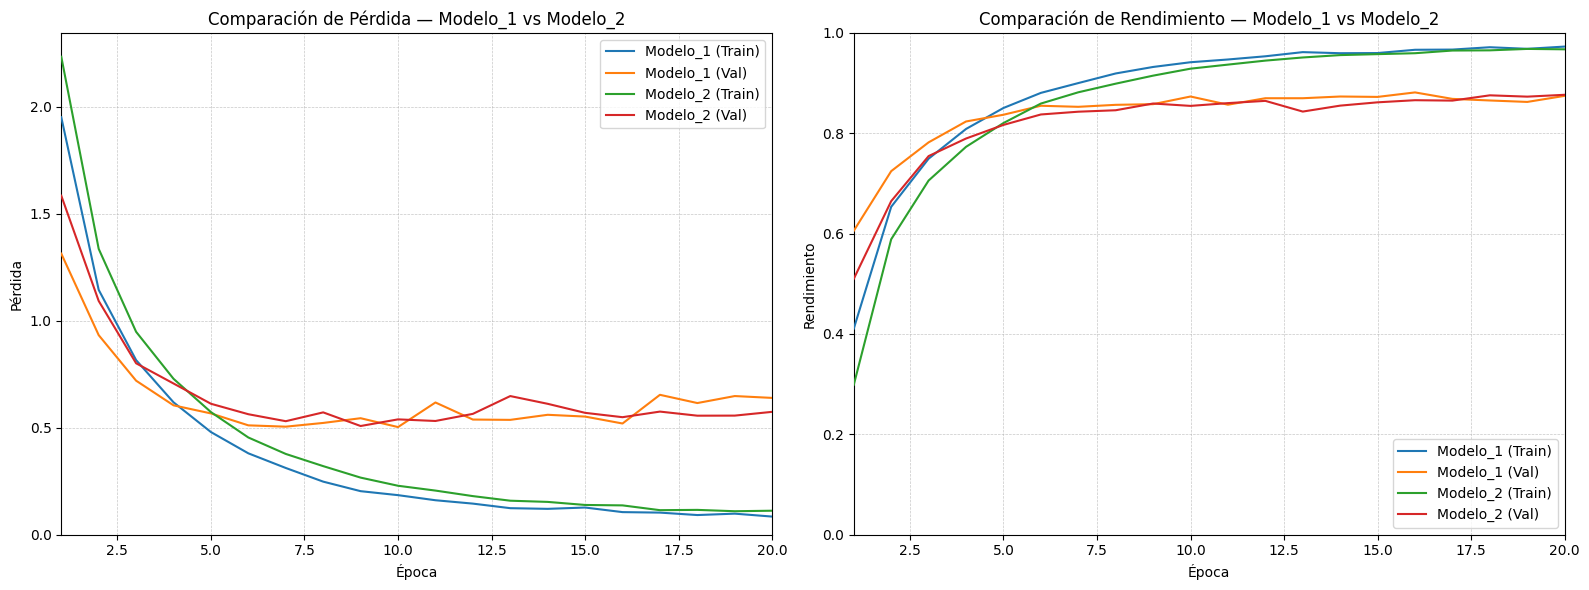

In [ ]:
comparar_modelos(history_1, history_2, 'Modelo_1', 'Modelo_2')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico se puede observar que el modelo 1 (línea `azul` y `naranja`) presenta una pérdida de validación que comienza a aumentar ligeramente después de la época 16, lo que indica el inicio del sobreajuste. A pesar de esto, su pérdida de validación (`0.5196`) es consistentemente menor que la del modelo 2 (línea `verde` y `roja`), que mantiene una pérdida de validación más alta (`0.5741`) pero estable hasta la última época.

Por otro lado, el gráfico de la derecha muestra la evolución del rendimiento (`accuracy`) para ambos modelos. Aquí se destaca que el modelo 1 alcanza una precisión de validación más alta (`0.8813`), pero su rendimiento comienza a estancarse y muestra fluctuaciones después de la época 16, lo que refuerza la evidencia de sobreajuste. En contraste, el modelo 2 muestra una curva de rendimiento más estable hasta la época 20, pero su precisión de validación (`0.8765`) es ligeramente inferior a la del modelo 1.

### Comparación en Test

In [ ]:
df = comparar_reports(report_1, report_2, 'Modelo 1', 'Modelo 2')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 1         0.973034          0.973672       0.973173         0.973069
1  Modelo 2         0.976404          0.977086       0.976413         0.976488

Comparando los dos modelos en el conjunto de prueba, el modelo 2 presenta un mejor rendimiento en términos de accuracy (`0.9764`), precisión (`0.9771`), recall (`0.9764`) y F1-Score (`0.9765`), superando al modelo 1 en todas las métricas clave. En contraste, el modelo 1 alcanza un accuracy de prueba de (`0.9730`), una precisión de (`0.9737`), un recall de (`0.9732`) y un F1-Score de (`0.9731`). Estos resultados indican que, aunque el modelo 1 mostró un mejor desempeño durante el entrenamiento y validación, el modelo 2 demuestra una mayor capacidad de generalización en datos no vistos, logrando clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba. En conclusión, el modelo 2 es superior en el conjunto de prueba, reflejando un mejor balance entre precisión y recall.

In [ ]:
all_histories['modelo2'] = history_2
all_models['modelo2'] = best_model_2

## Modelo 3

Se decidió aumentar la complejidad de la sección convolucional en comparación con los modelos anteriores. La arquitectura del `modelo3` incorpora cinco capas convolucionales ocultas: una primera capa con `64 filtros` y cuatro capas posteriores con `128 filtros` cada una. Todas utilizan filtros `3x3` y activación `relu`, y cada una va seguida por una capa `MaxPooling2D` con ventana de `2x2` para reducir la dimensionalidad. Un detalle relevante es que, de las cuatro capas de `128 filtros`, tres de ellas utilizan `padding="same"`, mientras que la primera capa de `64 filtros` y la primera de `128 filtros` no lo especifican, implicando un `padding 'valid'` por defecto.

Continuando con la estructura del modelo, después de esta sección convolucional expandida y la capa `Dropout` (con una tasa del `50%`), el `modelo3` mantiene la misma estructura para las capas densas que se utilizó en el `Modelo 1`. Es decir, presenta una única capa densa intermedia de `256 unidades` con activación `relu`, seguida por la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax` para la clasificación final, esto debido a que no se vio un aumento en el rendimiento del modelo con más capas densas. Este diseño busca evaluar si la mayor capacidad de extracción de características de una red convolucional más profunda, combinada con una etapa de clasificación densa más simple, resulta efectiva para el problema.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo3 | Adam | **`50`** | 32 | relu | **`5`** | 0 | **`5`** | 1 | **`2`** | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo3 = tf.keras.Sequential(
    [
        # Capa de entrada
        tf.keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        layers.Conv2D(64, (3,3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2,2), name="pooling_1"),

        # Bloque 2
        layers.Conv2D(128, (3,3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2,2), name="pooling_2"),

        # Bloque 3
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_3"),
        layers.MaxPooling2D((2,2), name="pooling_3"),

        # Bloque 4
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_4"),
        layers.MaxPooling2D((2,2), name="pooling_4"),

        # Bloque 5
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_5"),
        layers.MaxPooling2D((2,2), name="pooling_5"),
        layers.Dropout(0.5, name="dropout"),

        # Clasificador
        layers.Flatten(name="flatten"),
        layers.Dense(256, activation='relu', name="densa_1"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo3"
)


La compilación del tercer modelo se realiza con el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, monitoreando únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo3.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

 El entrenamiento se lleva a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`, empleando `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_3, history_3, report_3 = train_and_test(
    modelo3, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.1693 - loss: 2.6263 - val_accuracy: 0.5259 - val_loss: 1.4914
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5217 - loss: 1.4774 - val_accuracy: 0.7049 - val_loss: 0.9340
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6897 - loss: 0.9566 - val_accuracy: 0.7757 - val_loss: 0.7002
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7783 - loss: 0.6869 - val_accuracy: 0.8313 - val_loss: 0.5778
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8284 - loss: 0.5307 - val_accuracy: 0.8455 - val_loss: 0.4986
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8598 - loss: 0.4439 - val_accuracy: 0.8715 - val_loss: 0.4370
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8883 - loss: 0.3576 - val_accuracy: 0.8765 - val_loss: 0.4118
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9056 - loss: 0.3071 - val_ac

El `modelo 3` se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 48`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9891` y un accuracy de validación de `0.9239`, evidenciando una brecha significativa entre ambos, lo que sugiere sobreajuste (`overfitting`). Esta diferencia también se refleja en las pérdidas, donde la pérdida de entrenamiento (`0.0424`) es mucho menor que la pérdida de validación (`0.4777`), indicando que el modelo aprende de manera muy específica los patrones del entrenamiento, pero tiene dificultades para generalizar adecuadamente a nuevos datos.

Durante la evaluación final con los pesos de la época 48, el modelo alcanzó una precisión general (`accuracy`) de `0.9798` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `edna_krabappel`, y `principal_skinner` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson`, `homer_simpso`n y `nelson_muntz` presentan una ligera disminución en precisión, pero aún mantienen valores superiores a `0.94`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.97`, reflejando una alta capacidad de generalización.

El modelo 3 muestra un rendimiento sólido y equilibrado, con una capacidad notable para clasificar correctamente la mayoría de los personajes del conjunto de prueba, superando a los modelos anteriores en precisión de prueba (`0.9798`).

In [ ]:
historiales = [history_2, history_3]

In [ ]:
nombres_modelos = ['modelo2', 'modelo3']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion2 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo2', 'modelo3')

# Mostrar el DataFrame
df_comparacion2

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo2     20    0.9672   0.1122                  0.8765   
1  modelo3     48    0.9874   0.0489                  0.9239   

   Pérdida de Validación  
0                 0.5741  
1                 0.4777

Comparando el `modelo 2` y el `modelo 3`, el modelo 3 demuestra un rendimiento superior en términos de accuracy de validación (`0.9239`) y menor pérdida de validación (`0.4777`), en contraste con el modelo 2, que alcanzó un accuracy de validación de (`0.8765`) y una pérdida de validación de (`0.5741`). Esta mejora en el modelo 3 refleja una mayor capacidad para aprender patrones generales de los datos.

Sin embargo, la notable diferencia entre la precisión de entrenamiento y validación en el modelo 3 sugiere que aún existe cierto sobreajuste, aunque este se controla mejor que en los modelos anteriores debido a su menor pérdida de validación. Esto indica que el modelo 3 logra un mejor equilibrio entre aprender los patrones de entrenamiento y generalizar a nuevos datos.

### Visualización

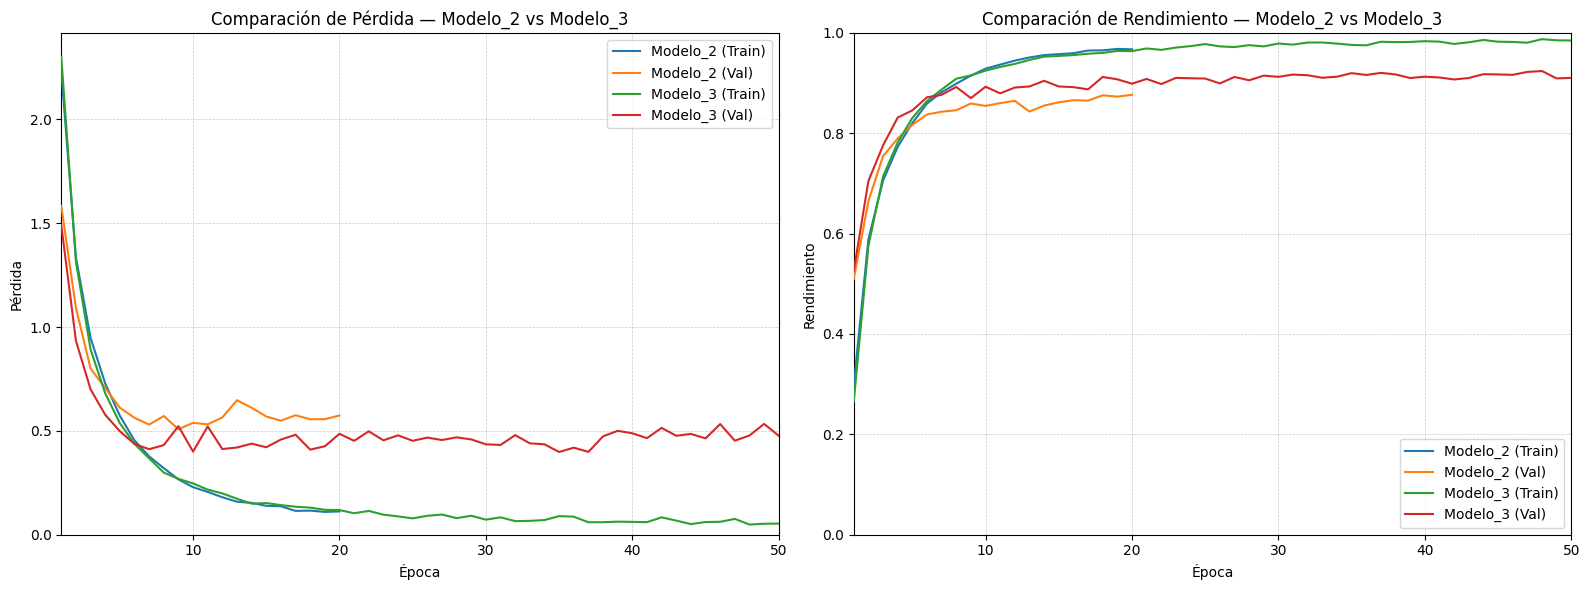

In [ ]:
comparar_modelos(history_2, history_3, 'Modelo_2', 'Modelo_3')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. Aquí se observa que el modelo 3 (línea `verde` y `roja`) logra una pérdida de entrenamiento significativamente menor que el modelo 2 (`0.0489` vs. `0.1122`), lo que indica un mejor ajuste a los datos de entrenamiento. Sin embargo, la pérdida de validación del modelo 3 (`0.4777`) es también menor que la del modelo 2 (`0.5741`), lo que demuestra que el modelo 3 mantiene una mejor capacidad de generalización en comparación con el modelo 2.

Sin embargo, también se evidencia un comportamiento típico de sobreajuste (`overfitting`) en el modelo 3. Esto se refleja en la separación marcada entre las curvas de pérdida de entrenamiento (`verde`) y validación (`roja`), especialmente después de la época 20, mientras que el modelo 2 mantiene una brecha más estable entre sus curvas de pérdida de entrenamiento (`azul`) y validación (`naranja`).

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. El modelo 3 logra un rendimiento de entrenamiento más alto (`0.9874`) en comparación con el modelo 2 (`0.9672`), pero su rendimiento de validación se mantiene más bajo y presenta fluctuaciones significativas. Esto indica que, aunque el modelo 3 aprende mejor los patrones del entrenamiento, su capacidad para generalizar a nuevos datos es limitada por el sobreajuste. En contraste, el modelo 2 mantiene una curva de precisión más estable, pero con un rendimiento general ligeramente inferior.

### Comparación en Test

In [ ]:
df = comparar_reports(report_2, report_3, 'Modelo 2', 'Modelo 3')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 2         0.976404          0.977086       0.976413         0.976488
1  Modelo 3         0.979775          0.980233       0.979839         0.979773

Comparando los dos modelos en el conjunto de prueba, el modelo 3 presenta un mejor rendimiento en términos de accuracy (`0.9798`), precisión (`0.9802`), recall (`0.9798`) y F1-Score (`0.9798`), superando al modelo 2 en todas las métricas clave. En contraste, el modelo 2 alcanza un accuracy de prueba de (`0.9764`), una precisión de (`0.9771`), un recall de (`0.9764`) y un F1-Score de (`0.9765`).

Estos resultados indican que, aunque el modelo 2 mostró un buen rendimiento durante el entrenamiento y validación, el modelo 3 demuestra una mayor capacidad de generalización en datos no vistos, logrando clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba. En conclusión, el modelo 3 es superior en el conjunto de prueba, reflejando un mejor balance entre precisión y recall.

In [ ]:
all_histories['modelo3'] = history_3
all_models['modelo3'] = best_model_3

## Modelo 4

Se ha implementado `BatchNormalization` en las arquitecturas de redes convolucionales (`CNN`) debido a su capacidad para mejorar el rendimiento y la estabilidad del modelo durante el entrenamiento. Esta técnica normaliza las activaciones de las neuronas dentro de cada mini-lote, ajustando su media y desviación estándar, garantizando que las activaciones presenten una **media cercana a 0** y una **desviación estándar cercana a 1**. Esto reduce la variabilidad en las distribuciones de las activaciones entre las capas del modelo, mitigando el problema del "desplazamiento interno de covarianza" (`internal covariate shift`). Como resultado, el modelo puede utilizar tasas de aprendizaje (`learning rate`) más altas sin riesgo de divergencia, acelerando el proceso de entrenamiento y promoviendo una convergencia más estable y rápida hacia una solución óptima. Además, `BatchNormalization` contribuye indirectamente a reducir el sobreajuste (`overfitting`), ya que al estabilizar las activaciones, disminuye la dependencia del modelo en patrones específicos del conjunto de entrenamiento, mejorando su capacidad de generalización.


Como cuarto modelo en esta serie de experimentos, en `modelo4` se explora una arquitectura convolucional más profunda y robusta al incorporar múltiples bloques de `Conv2D`, `BatchNormalization`, `Activation` y `MaxPooling2D`. Se basa en la estructura de mayor profundidad de la sección convolucional vista en el Modelo 3, pero añade la técnica de `Normalización por Lotes`. La arquitectura consta de cinco bloques `convolucionales/pooling`: el primero con `64 filtros` y los cuatro siguientes con `128 filtros`. Cada uno de estos bloques sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. La inclusión de `padding="same"` en todas las capas convolucionales de estos bloques ayuda a preservar el tamaño espacial de las características antes del pooling.


Continuando con la estructura del modelo, después de esta sección convolucional profunda con `Batch Normalization`, se mantiene la capa `Dropout` con una tasa del `50%` para regularización, seguida por la capa `Flatten`. La sección de capas densas presenta una diferencia respecto a los Modelos 1 y 3; aunque conserva una capa `Dense` intermedia de `256 unidades`, añade una capa `BatchNormalization` y una capa de activación `relu` después de la capa `Dense` y antes de la capa de salida. La capa de salida final es una capa `Dense` con `num_categ` (`18`) unidades y activación `softmax` para la clasificación. La incorporación de `BatchNormalization` no solo en las capas convolucionales sino también en la capa densa intermedia es una característica clave de este modelo, buscando mejorar la estabilidad y el rendimiento general.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo4 | Adam | 50 | 32 | relu | 5 | **`5`** | 5 | 1 | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo4 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo4"
)


Para su compilación, `modelo4` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, y se configura para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo4.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_4, history_4, report_4 = train_and_test(
    modelo4, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3388 - loss: 2.1829 - val_accuracy: 0.4354 - val_loss: 1.8378
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7269 - loss: 0.9034 - val_accuracy: 0.7147 - val_loss: 0.9227
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8102 - loss: 0.6122 - val_accuracy: 0.8139 - val_loss: 0.5865
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8557 - loss: 0.4656 - val_accuracy: 0.6973 - val_loss: 1.0352
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8941 - loss: 0.3563 - val_accuracy: 0.8668 - val_loss: 0.4405
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9133 - loss: 0.2830 - val_accuracy: 0.8355 - val_loss: 0.5628
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9318 - loss: 0.2283 - val_accuracy: 0.8368 - val_loss: 0.5240
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9443 - loss: 0.1818 - val

El `modelo 4` se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 48`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9936` y un accuracy de validación de `0.9426`, revelando una diferencia moderada entre ambos valores que indica la presencia de sobreajuste (`overfitting`). Esta diferencia se refleja también en las pérdidas, donde la pérdida de entrenamiento (`0.0162`) es considerablemente menor que la pérdida de validación (`0.3289`), lo que sugiere que el modelo aprende de manera muy específica los patrones del conjunto de entrenamiento, pero mantiene una buena capacidad de generalización en comparación con los modelos anteriores.

Durante la evaluación final con los pesos de la época 48, el modelo alcanzó una precisión general (`accuracy`) de `0.9798` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `chief_wiggum`, `comic_book_guy` y `marge_simpson` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson`, `homer_simpson` y `lisa_simpson` presentan una ligera disminución en precisión o recall, pero aún mantienen valores superiores a `0.94`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.97`, reflejando una alta capacidad de generalización en el conjunto de prueba.


El `modelo 4` demuestra un rendimiento sólido y equilibrado, logrando un accuracy de validación de `0.9426`, el más alto entre los modelos evaluados hasta ahora. Sin embargo, la diferencia entre las métricas de entrenamiento y validación revela cierto sobreajuste (`overfitting`), aunque mejor controlado que en modelos previos.

In [ ]:
historiales = [history_3, history_4]

In [ ]:
nombres_modelos = ['modelo3', 'modelo4']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion3 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo3', 'modelo4')

# Mostrar el DataFrame
df_comparacion3

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo3     48    0.9874   0.0489                  0.9239   
1  modelo4     48    0.9945   0.0153                  0.9426   

   Pérdida de Validación  
0                 0.4777  
1                 0.3289

Comparando el `modelo 3` y el `modelo 4`, el modelo 4 demuestra un rendimiento superior en términos de accuracy de validación (`0.9426`) y menor pérdida de validación (`0.3289`), en contraste con el modelo 3, que alcanzó un accuracy de validación de (`0.9239`) y una pérdida de validación de (`0.4777`).

Sin embargo, la diferencia entre el accuracy de entrenamiento y validación en el modelo 4 sugiere que aún existe cierto sobreajuste (`overfitting`), aunque este se controla mejor que en el modelo 3 debido a su menor pérdida de validación. Esto indica que el modelo 4 logra un mejor equilibrio entre aprender los patrones de entrenamiento y generalizar a nuevos datos.

### Visualización

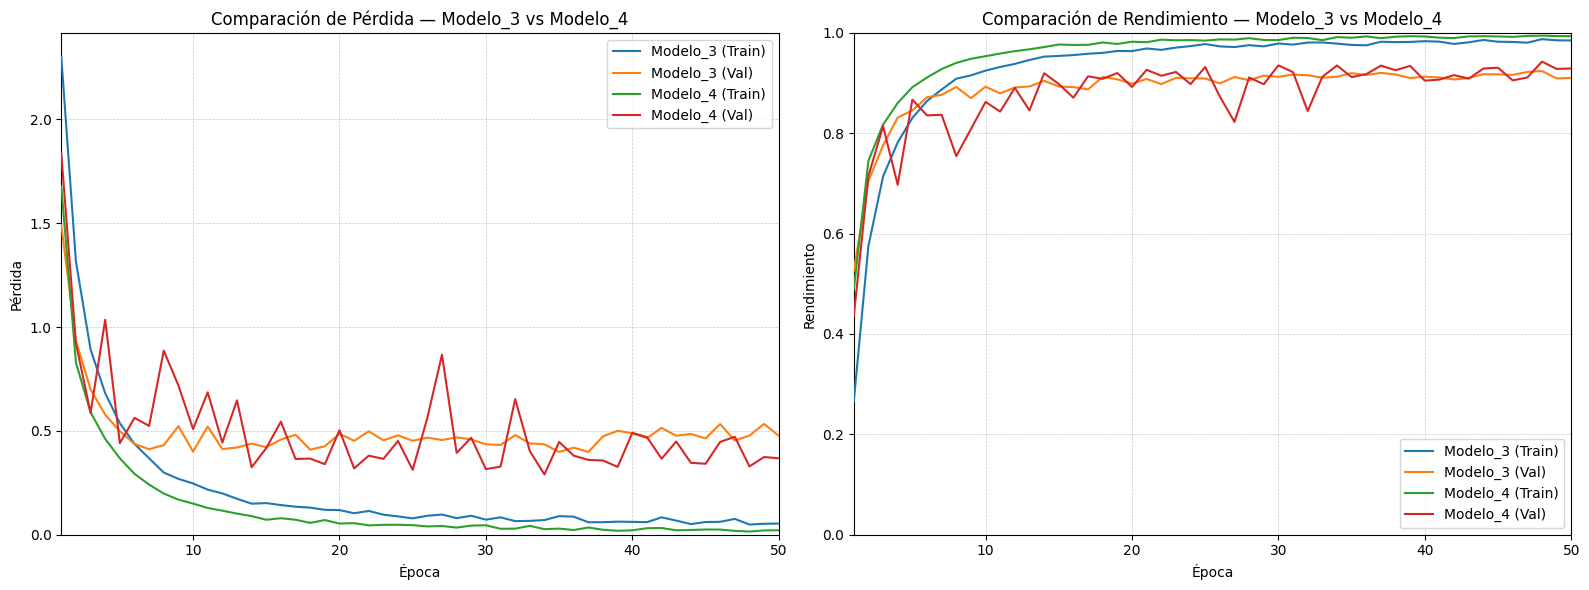

In [ ]:
comparar_modelos(history_3, history_4, 'Modelo_3', 'Modelo_4')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. Aquí se observa que el modelo 4 (línea `verde` y `roja`) logra una pérdida de entrenamiento significativamente menor que el modelo 3, lo que indica que el modelo 4 tiene una mejor capacidad para aprender los patrones del conjunto de entrenamiento. Además, su pérdida de validación (`0.3289`) es notablemente menor que la del modelo 3 (`0.4777`), lo que refleja una mejor capacidad para generalizar a nuevos datos.

Sin embargo, a pesar de su mejor pérdida de validación, el modelo 4 muestra una mayor fluctuación en la pérdida de validación (`línea roja`) a lo largo de las épocas, lo que sugiere una mayor sensibilidad a las variaciones en los datos de validación. Esto contrasta con el modelo 3 (`línea naranja`), que mantiene una curva de pérdida de validación más estable, aunque más alta.

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. El modelo 4 (`línea verde`) alcanza un accuracy de entrenamiento más alto (`0.9945`) en comparación con el modelo 3 (`0.9874`), mientras que su accuracy de validación (`0.9426`) también es superior al del modelo 3 (`0.9239`). Sin embargo, la curva de rendimiento de validación del modelo 4 (`línea roja`) presenta fluctuaciones más pronunciadas que el modelo 3 (`línea naranja`), lo que indica una mayor sensibilidad a las variaciones de los datos.

### Comparación en Test

In [ ]:
df = comparar_reports(report_3, report_4, 'Modelo 3', 'Modelo 4')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 3         0.979775          0.980233       0.979839         0.979773
1  Modelo 4         0.979775          0.981782       0.979721         0.980123

Comparando los dos modelos en el conjunto de prueba, el modelo 4 presenta un rendimiento ligeramente superior en términos de precisión (`0.9818`) y F1-Score (`0.9801`), en contraste con el modelo 3, que alcanza una precisión de (`0.9802`) y un F1-Score de (`0.9798`). Ambos modelos comparten el mismo accuracy de prueba (`0.9798`), lo que indica que clasifican correctamente una proporción casi idéntica de imágenes de prueba.

Sin embargo, el modelo 4 demuestra una mayor precisión, lo que sugiere que comete menos errores al predecir clases positivas, mientras que su recall (`0.9797`) es ligeramente inferior al del modelo 3 (`0.9798`), lo que indica que el modelo 3 detecta correctamente una proporción ligeramente mayor de ejemplos positivos.

Estos resultados reflejan que, aunque ambos modelos tienen un rendimiento muy similar en términos de accuracy, el modelo 4 ofrece un mejor balance entre precisión y recall, lo que se traduce en un F1-Score superior (`0.9801`). En conclusión, el modelo 4 es ligeramente superior en el conjunto de prueba, mostrando una mejor capacidad para clasificar correctamente las imágenes, especialmente en términos de precisión.

In [ ]:
all_histories['modelo4'] = history_4
all_models['modelo4'] = best_model_4

## Modelo 5

El `Dropout` en las capas convolucionales (`Conv2D`) del modelo como una técnica de regularización para prevenir el sobreajuste (`overfitting`). `Dropout` funciona apagando aleatoriamente algunos mapas de características durante el entrenamiento, lo que obliga al modelo a no depender excesivamente de patrones específicos y a aprender representaciones más generales. Esta estrategia es especialmente efectiva en redes convolucionales, ya que promueve la independencia entre las características aprendidas por los filtros. En las capas convolucionales, `Dropout` contribuye a que el modelo sea más robusto y capaz de generalizar mejor en datos no vistos, evitando que memorice patrones específicos del conjunto de entrenamiento. Por estas razones, se ha utilizado estratégicamente en los modelos experimentales, optimizando su capacidad de generalización.


Como quinto modelo en esta serie de experimentos, el `modelo5` parte de la arquitectura del `Modelo 4`, manteniendo la estructura profunda de los bloques convolucionales con `BatchNormalization`, pero introduciendo una regularización adicional mediante capas `Dropout` estratégicamente ubicadas dentro de la sección convolucional.

La arquitectura consiste en cinco bloques `convolucionales/pooling`: el primero con `64 filtros` y los cuatro siguientes con `128 filtros`. Cada bloque incluye `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por `BatchNormalization` y activación `relu`, y finalmente `MaxPooling2D` con ventana de `2x2`. La diferencia clave en este modelo es la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4. Se utiliza una tasa de `dropout` del `0.2` en el primer bloque y del `0.4` en los bloques 2, 3 y 4.

Continuando con la estructura del modelo, después del último bloque c`onvolucional/pooling` (Bloque 5, que no tiene dropout después del pooling), se mantiene la capa `Dropout` final con una tasa del `50%` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura del `Modelo 4`: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, una capa de activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La principal adición en el `modelo5` es la inserción de capas `Dropout` dentro de los primeros bloques convolucionales, buscando proporcionar una regularización adicional durante la extracción de características para prevenir el sobreajuste.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo5 | Adam | 50 | 32 | relu | 5 | 5 | 5 | **`5`** | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo5 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.4, name="dropout_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.4, name="dropout_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo5"
)


Para su compilación, `modelo5` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, y se configura para monitorear únicamente la métrica `accuracy` durante el entrenamiento, similar al Modelo 4.

In [ ]:
modelo5.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_5, history_5, report_5 = train_and_test(
    modelo5, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1921 - loss: 2.6477 - val_accuracy: 0.3677 - val_loss: 1.9772
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5018 - loss: 1.6140 - val_accuracy: 0.5030 - val_loss: 1.6064
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6144 - loss: 1.2583 - val_accuracy: 0.6541 - val_loss: 1.0665
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6870 - loss: 1.0163 - val_accuracy: 0.6341 - val_loss: 1.1575
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7247 - loss: 0.8706 - val_accuracy: 0.6575 - val_loss: 1.1752
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7643 - loss: 0.7500 - val_accuracy: 0.8171 - val_loss: 0.6140
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7909 - loss: 0.6690 - val_accuracy: 0.8221 - val_loss: 0.5790
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8180 - loss: 0.5913 - val_a

El `modelo 5` se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 46`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9489` y un accuracy de validación de `0.9500`, lo que indica un equilibrio notable entre ambas métricas, con una diferencia mínima que sugiere un buen control del sobreajuste (`overfitting`).

Este control se evidencia también en las pérdidas, donde la pérdida de entrenamiento (`0.1553`) es relativamente cercana a la pérdida de validación (`0.1838`), reflejando que el modelo no se limita a aprender patrones específicos del conjunto de entrenamiento, sino que mantiene su capacidad para generalizar adecuadamente a nuevos datos.

Durante la evaluación final con los pesos de la época 46, el modelo alcanzó una precisión general (`accuracy`) de `0.9663` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sólido en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `krusty_the_clown` y `sideshow_bob` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `homer_simpson` y `lisa_simpson` presentan una ligera disminución en precisión y recall, pero aún mantienen valores superiores a `0.86`, lo que indica que el modelo mantiene un buen desempeño.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.95`, reflejando una alta capacidad de generalización en el conjunto de prueba.

El `modelo 5` demuestra un rendimiento estable y equilibrado, logrando un accuracy de validación de `0.9500`, uno de los más altos entre los modelos evaluados. Su capacidad para mantener una pérdida de validación baja y una precisión alta sugiere que ha aprendido de manera efectiva los patrones de los datos sin caer en un sobreajuste significativo. Este modelo muestra una buena capacidad de generalización, destacándose por su precisión en el conjunto de prueba.

In [ ]:
historiales = [history_4, history_5]

In [ ]:
nombres_modelos = ['modelo4', 'modelo5']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion4 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo4', 'modelo5')

# Mostrar el DataFrame
df_comparacion4

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo4     48    0.9945   0.0153                  0.9426   
1  modelo5     46    0.9479   0.1641                  0.9500   

   Pérdida de Validación  
0                 0.3289  
1                 0.1838

Comparando el `modelo 4` y el `modelo 5`, el modelo 5 demuestra un mejor rendimiento en términos de accuracy de validación (`0.9500`) y menor pérdida de validación (`0.1838`), en contraste con el modelo 4, que alcanzó un accuracy de validación de (`0.9426`) y una pérdida de validación de (`0.3289`). Esta mejora en el modelo 5 refleja una mayor capacidad para aprender patrones generales de los datos sin caer en un sobreajuste significativo.

Sin embargo, la notable diferencia entre la precisión de entrenamiento del modelo 4 (`0.9945`) y la del modelo 5 (`0.9479`) indica que el modelo 4 tiene una mayor capacidad para ajustarse a los datos de entrenamiento, pero esta ventaja no se traduce en un mejor desempeño en validación. En cambio, el modelo 5, a pesar de tener un accuracy de entrenamiento más bajo, logra generalizar mejor a nuevos datos, como se refleja en su menor pérdida de validación.

### Visualización

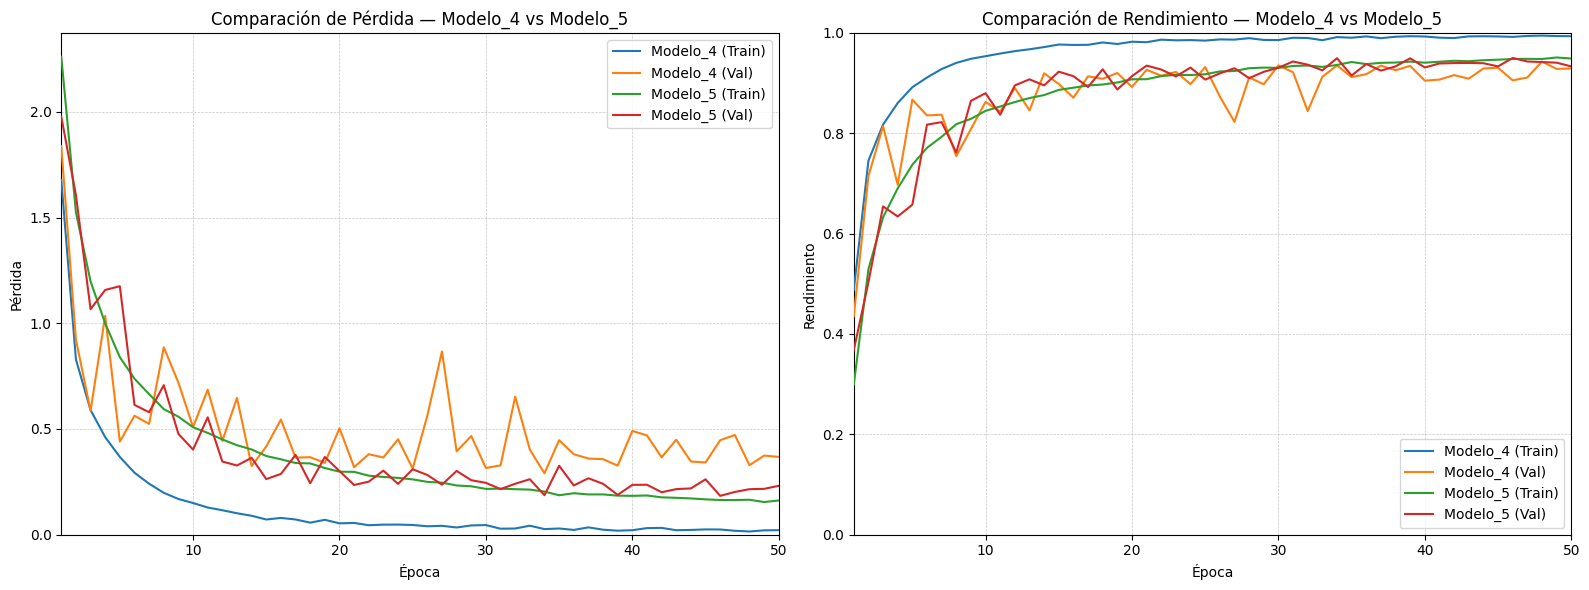

In [ ]:
comparar_modelos(history_4, history_5, 'Modelo_4', 'Modelo_5')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico, se observa que el modelo 4 (línea `azul` y `naranja`) mantiene una pérdida de entrenamiento consistentemente baja (`0.0153`), pero su pérdida de validación (`línea naranja`) es considerablemente más alta y fluctuante (`0.3289`), lo que indica una mayor sensibilidad a las variaciones del conjunto de validación.

En contraste, el modelo 5 (línea `verde` y `roja`) muestra una pérdida de entrenamiento moderada (`0.1641`), pero mantiene una pérdida de validación significativamente menor (`0.1838`) en comparación con el modelo 4. Esto refleja una mejor capacidad de generalización del modelo 5, ya que no solo logra aprender los patrones del entrenamiento, sino que también mantiene un rendimiento estable en validación.

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. El modelo 4 (`línea azul`) alcanza un accuracy de entrenamiento más alto (`0.9945`), pero su precisión en validación es inferior y fluctúa significativamente. Por otro lado, el modelo 5 (`línea verde`) muestra un rendimiento estable y consistente tanto en entrenamiento como en validación, logrando un accuracy de validación (`0.9500`) superior al modelo 4.

### Comparación en Test

In [ ]:
df = comparar_reports(report_4, report_5, 'Modelo 4', 'Modelo 5')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 4         0.979775          0.981782       0.979721         0.980123
1  Modelo 5         0.966292          0.970725       0.966413         0.967107

Comparando los dos modelos en el conjunto de prueba, el modelo 4 presenta un mejor rendimiento en términos de accuracy (`0.9798`), precisión (`0.9818`), recall (`0.9797`) y F1-Score (`0.9801`), superando al modelo 5, que alcanza un accuracy de prueba de (`0.9663`), una precisión de (`0.9707`), un recall de (`0.9664`) y un F1-Score de (`0.9671`).

Estos resultados indican que, aunque el modelo 5 logró un mejor equilibrio entre precisión y pérdida durante el entrenamiento y validación, su capacidad para generalizar en el conjunto de prueba es inferior a la del modelo 4. Esto sugiere que el modelo 4, a pesar de tener un comportamiento más inestable en la pérdida de validación, logra clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba.

In [ ]:
all_histories['modelo5'] = history_5
all_models['modelo5'] = best_model_5

## Modelo 6

Como sexto modelo en esta fase de experimentación, el `modelo6` parte de la arquitectura del `Modelo 5`, conservando la estructura profunda con `BatchNormalization`, pero ajustando las tasas de `Dropout` dentro de la sección convolucional.

La arquitectura inicial es idéntica a la del `Modelo 5`, consistiendo en cinco bloques `convolucionales/pooling` donde el primero tiene `64 filtros` y los cuatro siguientes tienen `128 filtros`. Cada bloque incluye `Conv2D` (`filtro 3x3`, `padding="same"`), `BatchNormalization`, activación `relu`, y `MaxPooling2D` (`ventana 2x2`). La diferencia principal de modelo6 respecto a modelo5 se encuentra en las tasas de `Dropout` aplicadas después del `MaxPooling2D` en los bloques 1, 2, 3 y 4. Mientras que el Bloque 1 mantiene una tasa de `0.2`, los Bloques 2 y 3 ahora utilizan una tasa de `0.3`, y el Bloque 4 utiliza una tasa de `0.4`.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5), se mantienen la capa `Dropout` final con una tasa del `50%`, seguida por la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La modificación clave en el `modelo6` son los ajustes en las tasas de dropout dentro de los bloques convolucionales, buscando encontrar un equilibrio de regularización más efectivo para mejorar el rendimiento.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo6 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo6 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.3, name="dropout_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.3, name="dropout_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo6"
)


Para su compilación, el `modelo6` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo6.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_6, history_6, report_6 = train_and_test(
    modelo6, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.2298 - loss: 2.5326 - val_accuracy: 0.2509 - val_loss: 2.5030
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5253 - loss: 1.5106 - val_accuracy: 0.6257 - val_loss: 1.1268
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6418 - loss: 1.1471 - val_accuracy: 0.6525 - val_loss: 1.0886
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7151 - loss: 0.9280 - val_accuracy: 0.7797 - val_loss: 0.7066
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7634 - loss: 0.7619 - val_accuracy: 0.8142 - val_loss: 0.5947
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7990 - loss: 0.6521 - val_accuracy: 0.8592 - val_loss: 0.4713
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8166 - loss: 0.5903 - val_accuracy: 0.8381 - val_loss: 0.5356
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8373 - loss: 0.5408 - val_

El `modelo 6` se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 48`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9638` y un accuracy de validación de `0.9579`, lo que indica una diferencia moderada entre ambos valores que refleja un buen control del sobreajuste (`overfitting`). Esta diferencia se observa también en las pérdidas, donde la pérdida de entrenamiento (`0.1176`) es cercana a la pérdida de validación (`0.1759`), lo que sugiere que el modelo mantiene un equilibrio adecuado entre aprender los patrones del entrenamiento y generalizar a nuevos datos.

Durante la evaluación final con los pesos de la época 48, el modelo alcanzó una precisión general (`accuracy`) de `0.9865` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `chief_wiggum`, `comic_book_guy`, `homer_simpson`, `krusty_the_clown`, `marge_simpson` y `sideshow_bob` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson` y `lisa_simpson` presentan una ligera disminución en precisión o recall, pero aún mantienen valores superiores a `0.96`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.98`, reflejando una alta capacidad de generalización en el conjunto de prueba.

El `modelo 6` demuestra un rendimiento sólido y estable, logrando un accuracy de validación de `0.9579`, superior a varios de los modelos anteriores. Su capacidad para mantener una baja pérdida de validación y una alta precisión en el conjunto de prueba indica que ha logrado un buen equilibrio entre aprendizaje y generalización. Este modelo muestra un rendimiento muy competitivo y podría ser considerado como uno de los mejores modelos hasta ahora en términos de precisión y capacidad de generalización.

In [ ]:
historiales = [history_5, history_6]

In [ ]:
nombres_modelos = ['modelo5', 'modelo6']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion5 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo5', 'modelo6')

# Mostrar el DataFrame
df_comparacion5

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo5     46    0.9479   0.1641                  0.9500   
1  modelo6     48    0.9639   0.1158                  0.9579   

   Pérdida de Validación  
0                 0.1838  
1                 0.1759

Comparando el `modelo 5` y el `modelo 6`, el modelo 6 demuestra un mejor rendimiento en términos de accuracy de validación (`0.9579`) y menor pérdida de validación (`0.1759`), en contraste con el modelo 5, que alcanzó un accuracy de validación de (`0.9500`) y una pérdida de validación de (`0.1838`). Esta mejora en el modelo 6 refleja una mayor capacidad para aprender patrones generales de los datos sin caer en un sobreajuste significativo.

Además, el accuracy de entrenamiento del modelo 6 (`0.9639`) es superior al del modelo 5 (`0.9479`), lo que indica que el modelo 6 ha aprendido mejor los patrones del conjunto de entrenamiento, sin comprometer su capacidad de generalización, como se refleja en su menor pérdida de validación.

### Visualización

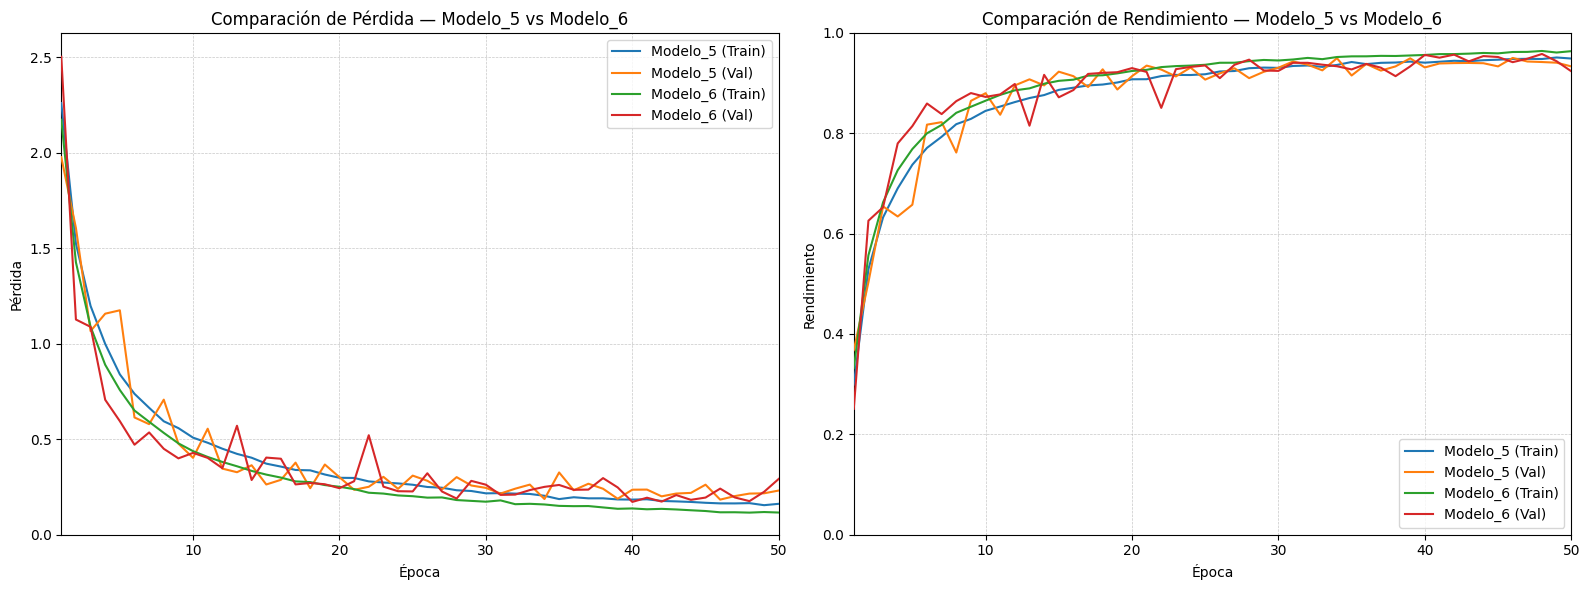

In [ ]:
comparar_modelos(history_5, history_6, 'Modelo_5', 'Modelo_6')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico, se observa que el modelo 6 (línea `verde` y `roja`) mantiene una pérdida de validación más baja y estable (`0.1759`), en comparación con el modelo 5 (línea `naranja` y `roja`), que presenta una pérdida de validación más alta (`0.1838`) y con mayores fluctuaciones.

El modelo 6 también logra una pérdida de entrenamiento más baja (`0.1158`), lo que indica una mejor capacidad para aprender los patrones del conjunto de entrenamiento sin caer en un sobreajuste significativo. En cambio, el modelo 5 muestra una pérdida de entrenamiento más alta (`0.1641`), lo que refleja un aprendizaje menos efectivo.

En el gráfico de la derecha, que muestra el rendimiento (`accuracy`), el modelo 6 (línea `verde` y `roja`) mantiene una precisión de validación más alta (0.9579), en comparación con el modelo 5 (línea `naranja` y `roja`), que alcanza un accuracy de validación de (`0.9500`). El modelo 6 logra una curva de rendimiento más estable y alta, mientras que el modelo 5 presenta más variaciones, especialmente en las primeras épocas.

### Comparación en Test

In [ ]:
df = comparar_reports(report_5, report_6, 'Modelo 5', 'Modelo 6')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 5         0.966292          0.970725       0.966413         0.967107
1  Modelo 6         0.986517          0.986816       0.986621         0.986541

Comparando los dos modelos en el conjunto de prueba, el modelo 6 presenta un mejor rendimiento en términos de accuracy (`0.9865`), precisión (`0.9868`), recall (`0.9866`) y F1-Score (`0.9865`), superando al modelo 5, que alcanza un accuracy de prueba de (`0.9663`), una precisión de (`0.9707`), un recall de (`0.9664`) y un F1-Score de (`0.9671`).

Estos resultados indican que, aunque el modelo 5 mostró un buen equilibrio entre precisión y pérdida durante el entrenamiento y validación, su capacidad para generalizar en el conjunto de prueba es inferior a la del modelo 6. Esto sugiere que el modelo 6 no solo ha aprendido mejor los patrones del entrenamiento, sino que también logra clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba.

En conclusión, el modelo 6 es superior en el conjunto de prueba, reflejando un mejor balance entre precisión y recall, y una mayor capacidad de generalización.

In [ ]:
all_histories['modelo6'] = history_6
all_models['modelo6'] = best_model_6

## Modelo 7

Como séptimo modelo en esta serie de experimentos, el `modelo7` explora una arquitectura con una capacidad de extracción de características significativamente mayor al incrementar el número de filtros en las capas convolucionales, manteniendo la estructura profunda y el uso de `BatchNormalization` observados en modelos anteriores.

La arquitectura sigue una estructura secuencial similar a la de los Modelos anteriores, consistiendo en cinco bloques `convolucionales/pooling`. Sin embargo, en el `modelo7`, todas las capas `Conv2D` dentro de estos bloques utilizan `256 filtros` (a diferencia de la progresión 64-128-128-128-128 de los modelos anteriores). Cada bloque sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. Además, se mantiene la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4, y en este modelo se utiliza una tasa de `dropout` uniforme del `0.5` en estos cuatro bloques.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5, sin dropout después del pooling), se mantiene la capa `Dropout` final con una tasa del` 0.5` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura del Modelo 4, 5 y 6: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La principal modificación en el `modelo7` es el aumento sustancial en el número de filtros convolucionales y la aplicación consistente de una tasa de `dropout` del `0.5` en la sección convolucional, buscando potenciar la capacidad del modelo para aprender representaciones complejas de las imágenes.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo7 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo7 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(256, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.5, name="dropout_1"),

        # Bloque 2
        Conv2D(256, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.5, name="dropout_2"),

        # Bloque 3
        Conv2D(256, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.5, name="dropout_3"),

        # Bloque 4
        Conv2D(256, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.5, name="dropout_4"),

        # Bloque 5
        Conv2D(256, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo7"
)


Para su compilación, el `modelo7` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo7.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_7, history_7, report_7 = train_and_test(
    modelo7, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.2237 - loss: 2.5953 - val_accuracy: 0.2561 - val_loss: 2.3887
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5256 - loss: 1.5215 - val_accuracy: 0.5944 - val_loss: 1.3724
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6497 - loss: 1.1326 - val_accuracy: 0.7365 - val_loss: 0.8314
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7213 - loss: 0.8917 - val_accuracy: 0.7094 - val_loss: 0.9053
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7686 - loss: 0.7538 - val_accuracy: 0.7981 - val_loss: 0.6411
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7923 - loss: 0.6679 - val_accuracy: 0.8218 - val_loss: 0.5678
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8215 - loss: 0.5793 - val_accuracy: 0.8526 - val_loss: 0.4747
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.8386 - loss: 0.5170 - 

El `modelo 7` se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 49`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9651` y un accuracy de validación de `0.9571`, mostrando una diferencia moderada entre ambos valores, lo que refleja un buen control del sobreajuste (`overfitting`). Esta diferencia se observa también en las pérdidas, donde la pérdida de entrenamiento (`0.1047`) es cercana a la pérdida de validación (`0.1803`), lo que sugiere que el modelo mantiene un equilibrio adecuado entre aprender los patrones del entrenamiento y generalizar a nuevos datos.

Durante la evaluación final con los pesos de la época 49, el modelo alcanzó una precisión general (`accuracy`) de `0.9831` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sobresaliente en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `chief_wiggum`, `krusty_the_clown`, `moe_szyslak`, `principal_skinner` y `sideshow_bob` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson`, `lisa_simpson` y `nelson_muntz` presentan una ligera disminución en precisión o recall, pero aún mantienen valores superiores a `0.96`.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.97`, reflejando una alta capacidad de generalización en el conjunto de prueba.

El modelo 7 demuestra un rendimiento sólido y estable, logrando un accuracy de validación de `0.9571`, similar al modelo 6 pero con un mejor control del sobreajuste, como se refleja en su estabilidad durante las épocas finales. Su capacidad para mantener una baja pérdida de validación y una alta precisión en el conjunto de prueba indica que ha logrado un buen equilibrio entre aprendizaje y generalización. Este modelo muestra un rendimiento competitivo, destacándose en la clasificación de la mayoría de los personajes.

In [ ]:
historiales = [history_6, history_7]

In [ ]:
nombres_modelos = ['modelo6', 'modelo7']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion6 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo6', 'modelo7')

# Mostrar el DataFrame
df_comparacion6

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo6     48    0.9639   0.1158                  0.9579   
1  modelo7     49    0.9627   0.1115                  0.9571   

   Pérdida de Validación  
0                 0.1759  
1                 0.1803

Comparando el `modelo 6` y el `modelo 7`, el modelo 6 presenta un rendimiento ligeramente superior en términos de accuracy de validación (`0.9579`) y menor pérdida de validación (`0.1759`), en contraste con el modelo 7, que alcanzó un accuracy de validación de (`0.9571`) y una pérdida de validación de (`0.1803`). Esta diferencia indica que el modelo 6 tiene una mejor capacidad para generalizar a nuevos datos.

Sin embargo, el modelo 7 muestra una pérdida de entrenamiento menor (`0.1115`) en comparación con el modelo 6 (`0.1158`), lo que sugiere que el modelo 7 ha aprendido mejor los patrones del conjunto de entrenamiento. A pesar de esto, su precisión de validación y pérdida son ligeramente inferiores, lo que indica que el modelo 6 ha logrado un mejor equilibrio entre aprender los patrones del entrenamiento y generalizar a nuevos datos.

En conclusión, el modelo 6 es superior en capacidad de generalización, manteniendo una menor pérdida de validación y un accuracy de validación más alto. El modelo 7, aunque competitivo, muestra una ligera tendencia a ajustarse mejor a los datos de entrenamiento sin superar al modelo 6 en rendimiento general.

### Visualización

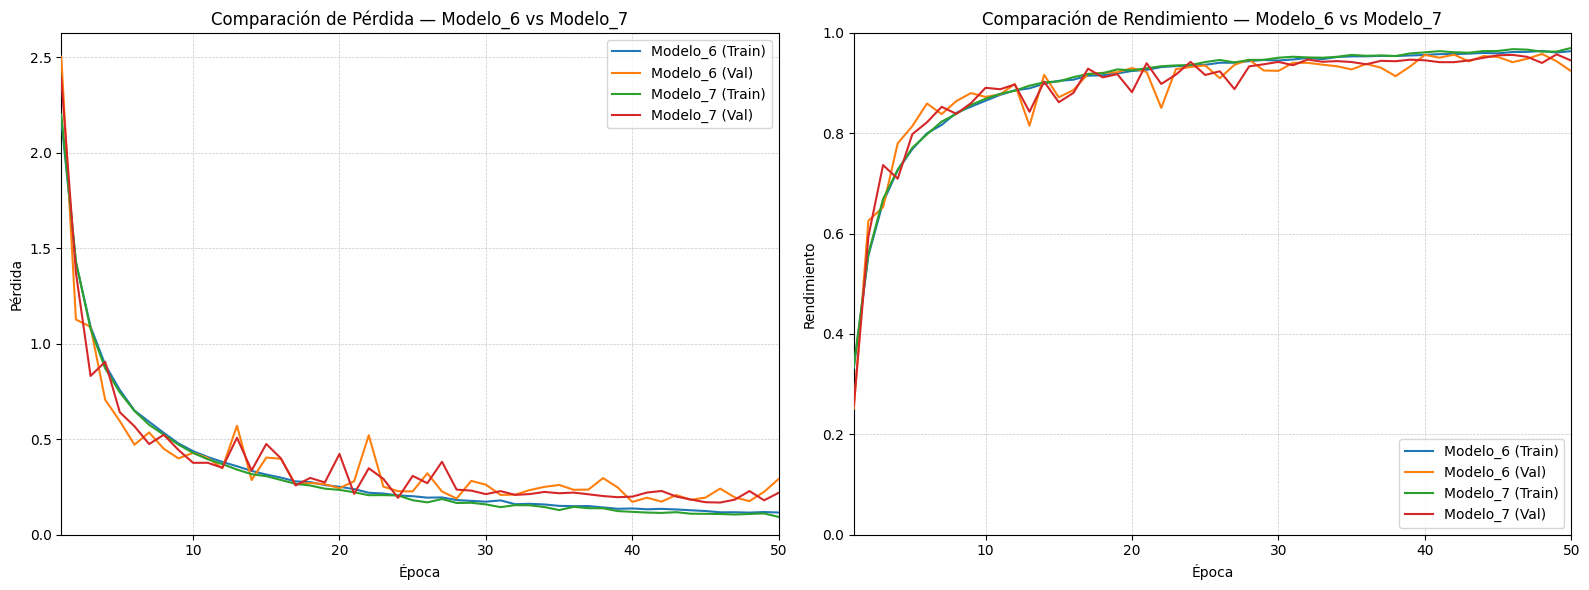

In [ ]:
comparar_modelos(history_6, history_7, 'Modelo_6', 'Modelo_7')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico, se observa que el modelo 6 (línea `verde` y `naranja`) mantiene una pérdida de validación más baja (`0.1759`) y más estable en comparación con el modelo 7 (`línea roja`), que muestra una pérdida de validación ligeramente más alta (`0.1803`) y con mayores fluctuaciones a lo largo del entrenamiento.

La pérdida de entrenamiento del modelo 6 (`0.1158`) es también muy cercana a la del modelo 7 (`0.1115`), pero el modelo 6 muestra una curva más suave y consistente, lo que sugiere un mejor equilibrio entre aprender los patrones del entrenamiento y generalizar a nuevos datos. En cambio, el modelo 7, aunque competitivo, presenta más variabilidad en su curva de pérdida de validación, lo que sugiere una mayor sensibilidad a las fluctuaciones del conjunto de validación.

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. El modelo 6 (`línea verde`) mantiene una curva de rendimiento más estable y ligeramente superior en las últimas épocas, mientras que el modelo 7 (`línea roja`) muestra una accuracy que fluctúa más a lo largo del entrenamiento. Esto indica que el modelo 6 tiene una mayor capacidad para generalizar y mantener un rendimiento consistente.

El modelo 6 demuestra ser superior al modelo 7, manteniendo una menor pérdida de validación y una curva de accuracy más estable. Aunque el modelo 7 logra un buen rendimiento, sus fluctuaciones en la pérdida de validación sugieren una mayor sensibilidad a las variaciones del conjunto de validación, lo que podría indicar un menor control del sobreajuste en comparación con el modelo 6.

### Comparación en Test

In [ ]:
df = comparar_reports(report_6, report_7, 'Modelo 6', 'Modelo 7')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 6         0.986517          0.986816       0.986621         0.986541
1  Modelo 7         0.983146          0.983632       0.983032         0.983057

Comparando los dos modelos en el conjunto de prueba, el modelo 6 presenta un mejor rendimiento en términos de accuracy (`0.9865`), precisión (`0.9868`), recall (`0.9866`) y F1-Score (`0.9865`), superando al modelo 7, que alcanza un accuracy de prueba de (`0.9831`), una precisión de (`0.9836`), un recall de (`0.9830`) y un F1-Score de (`0.9831`).

Estos resultados indican que, aunque el modelo 7 mostró un buen desempeño durante el entrenamiento y validación, su capacidad para generalizar en el conjunto de prueba es inferior a la del modelo 6. Esto sugiere que el modelo 6 no solo ha aprendido mejor los patrones del entrenamiento, sino que también logra clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba.

En conclusión, el modelo 6 es superior en el conjunto de prueba, logrando mejores métricas en todas las categorías, lo que refleja una mayor capacidad para clasificar correctamente las imágenes y una mejor generalización.

In [ ]:
all_histories['modelo7'] = history_7
all_models['modelo7'] = best_model_7

## Modelo 8

Como octavo modelo en esta fase de experimentación, el `modelo8` regresa a una configuración de filtros convolucionales más moderada en comparación con el `Modelo 7`, pero mantiene la estructura profunda, el uso de `BatchNormalization` y las capas `Dropout` dentro de la sección convolucional.

La arquitectura sigue una estructura secuencial similar a la de los modelos anteriores, consistiendo en cinco bloques `convolucionales/pooling`. Sin embargo, en el `modelo8`, todas las capas `Conv2D` dentro de estos bloques utilizan `128 filtros`. Cada bloque sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. Se mantiene la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4, y en este modelo se utiliza una tasa de `dropout` uniforme del `0.4` en estos cuatro bloques.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5), se mantiene la capa `Dropout` final con una tasa del `0.5` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La modificación principal en el `modelo8` es la reducción en el número de filtros convolucionales a `128` en todas las capas (a diferencia de los `256` del `Modelo 7`) y el uso de una tasa de `dropout` uniforme del `0.4` en los bloques convolucionales, buscando encontrar un equilibrio entre la capacidad del modelo y la regularización.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo8 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |


In [ ]:
modelo8 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(128, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.4, name="dropout_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.4, name="dropout_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.4, name="dropout_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo8"
)


Para su compilación, el `modelo8` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo8.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_8, history_8, report_8 = train_and_test(
    modelo8, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.2055 - loss: 2.6244 - val_accuracy: 0.2380 - val_loss: 2.5929
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.4783 - loss: 1.6960 - val_accuracy: 0.5923 - val_loss: 1.3279
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6013 - loss: 1.3247 - val_accuracy: 0.5641 - val_loss: 1.3449
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6630 - loss: 1.0912 - val_accuracy: 0.7033 - val_loss: 0.9775
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7130 - loss: 0.9329 - val_accuracy: 0.6931 - val_loss: 0.9261
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7585 - loss: 0.7911 - val_accuracy: 0.7870 - val_loss: 0.6701
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7886 - loss: 0.6941 - val_accuracy: 0.8489 - val_loss: 0.5055
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8073 - loss: 0.6376 - val

El modelo 8 se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 50`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9479` y un accuracy de validación de `0.9500`, mostrando un equilibrio adecuado entre ambas métricas, lo que refleja un buen control del sobreajuste (`overfitting`). Esta estabilidad también se observa en las pérdidas, donde la pérdida de entrenamiento (`0.1675`) es cercana a la pérdida de validación (`0.1846`), lo que indica que el modelo mantiene una capacidad de generalización adecuada.

Durante la evaluación final con los pesos de la época 50, el modelo alcanzó una precisión general (`accuracy`) de `0.9775` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sólido en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `marge_simpson` y `sideshow_bob` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `lisa_simpson` y `ned_flanders` presentan una ligera disminución en precisión o recall, pero aún mantienen valores superiores a `0.93`, reflejando un buen desempeño general.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.96`, lo que indica una alta capacidad de generalización en el conjunto de prueba.

El modelo 8 demuestra un rendimiento estable y consistente, logrando un accuracy de validación de `0.9500` y una pérdida de validación (`0.1846`). Aunque su precisión en el conjunto de prueba es ligeramente inferior a la de los mejores modelos evaluados, mantiene un buen equilibrio entre aprender los patrones del entrenamiento y generalizar adecuadamente a nuevos datos. Este modelo es competitivo y muestra un buen desempeño en la clasificación de la mayoría de los personajes.

In [ ]:
historiales = [history_7, history_8]

In [ ]:
nombres_modelos = ['modelo7', 'modelo8']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion7 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo7', 'modelo8')

# Mostrar el DataFrame
df_comparacion7

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo7     49    0.9627   0.1115                  0.9571   
1  modelo8     50    0.9482   0.1656                  0.9500   

   Pérdida de Validación  
0                 0.1803  
1                 0.1846

Comparando el `modelo 7` y el `modelo 8`, el modelo 7 presenta un mejor rendimiento en términos de accuracy de validación (`0.9571`) y menor pérdida de validación (`0.1803`), en contraste con el modelo 8, que alcanzó un accuracy de validación de (`0.9500`) y una pérdida de validación de (`0.1846`). Esta diferencia refleja que el modelo 7 tiene una mejor capacidad para generalizar a nuevos datos.

Además, el accuracy de entrenamiento del modelo 7 (`0.9627`) es superior al del modelo 8 (`0.9482`), lo que indica que el modelo 7 ha aprendido mejor los patrones del conjunto de entrenamiento sin comprometer su capacidad de generalización. El modelo 8, aunque mantiene una estabilidad adecuada, presenta una pérdida de entrenamiento más alta (`0.1656`), lo que sugiere un aprendizaje menos efectivo.

### Visualización

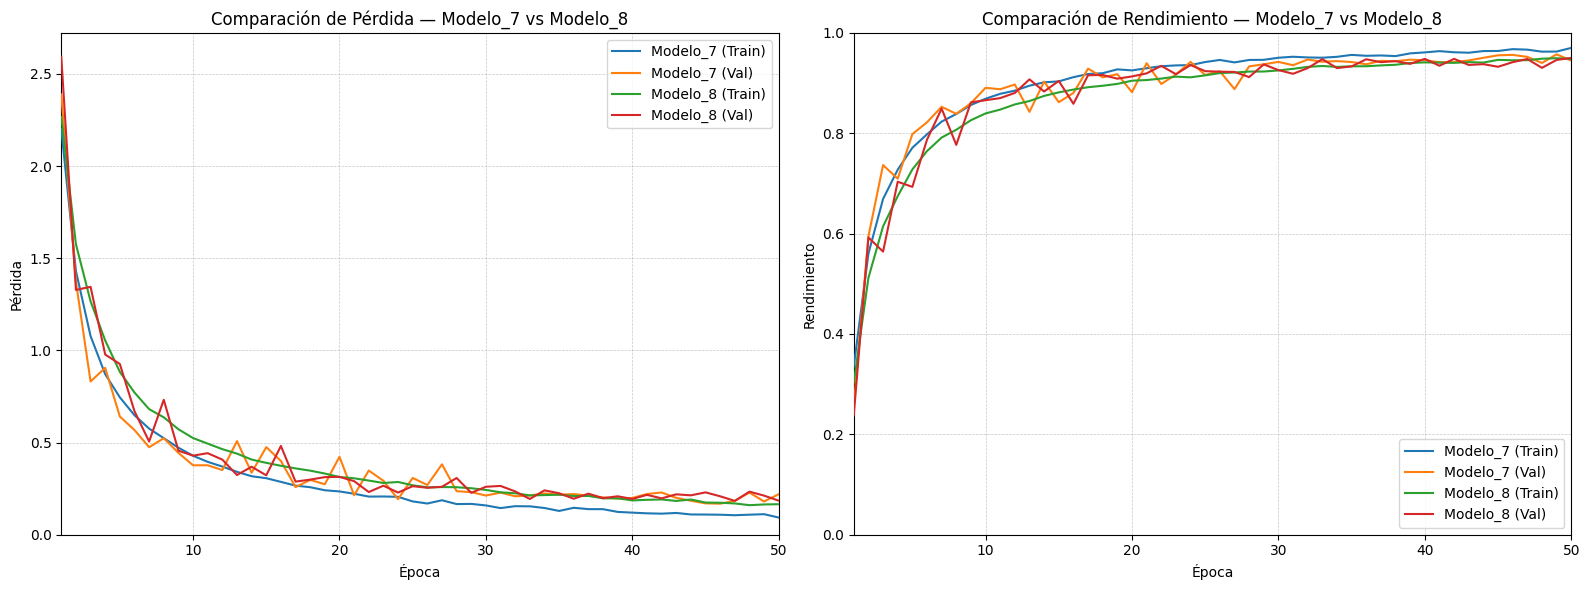

In [ ]:
comparar_modelos(history_7, history_8, 'Modelo_7', 'Modelo_8')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico, se observa que el modelo 7 (línea `azul` y `naranja`) mantiene una pérdida de validación más baja (`0.1803`) y más estable en comparación con el modelo 8 (línea `verde` y `roja`), que presenta una pérdida de validación ligeramente más alta (`0.1846`) y con mayores fluctuaciones.

La pérdida de entrenamiento del modelo 7 (`0.1115`) es también más baja que la del modelo 8 (`0.1656`), lo que indica que el modelo 7 ha aprendido mejor los patrones del conjunto de entrenamiento y ha logrado generalizar mejor a los datos de validación. El modelo 8, aunque competitivo, muestra una pérdida de validación más alta y menos consistente, lo que refleja una mayor sensibilidad a las variaciones del conjunto de validación.

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. El modelo 7 (línea `azul` y `naranja`) mantiene una precisión de validación más alta (`0.9571`), en comparación con el modelo 8 (`0.9500`), y muestra una curva de rendimiento más estable. El modelo 8, aunque muestra un rendimiento competitivo, presenta fluctuaciones más notables, lo que sugiere que su capacidad de generalización es ligeramente inferior.

### Comparación en Test

In [ ]:
df = comparar_reports(report_7, report_8, 'Modelo 7', 'Modelo 8')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 7         0.983146          0.983632       0.983032         0.983057
1  Modelo 8         0.977528          0.978337       0.977617         0.977618

Comparando los dos modelos en el conjunto de prueba, el modelo 7 presenta un mejor rendimiento en términos de accuracy (`0.9831`), precisión (`0.9836`), recall (`0.9830`) y F1-Score (`0.9831`), superando al modelo 8, que alcanza un accuracy de prueba de (`0.9775`), una precisión de (`0.9783`), un recall de (`0.9776`) y un F1-Score de (`0.9776`).

Estos resultados indican que, aunque el modelo 8 mostró un buen desempeño durante el entrenamiento y validación, su capacidad para generalizar en el conjunto de prueba es inferior a la del modelo 7. Esto sugiere que el modelo 7 no solo ha aprendido mejor los patrones del entrenamiento, sino que también logra clasificar correctamente una mayor proporción de imágenes en el conjunto de prueba.

In [ ]:
all_histories['modelo8'] = history_8
all_models['modelo8'] = best_model_8

## Modelo 9

Como noveno modelo en esta fase de experimentación arquitectónica, el `modelo9` busca combinar múltiples técnicas que han sido exploradas individualmente en modelos anteriores, enfocándose en aumentar la robustez y la capacidad de generalización del modelo.

La arquitectura comienza con la incorporación de capas de `Data Augmentation` justo después de la capa de entrada. Específicamente, incluye `RandomFlip("horizontal")`, `RandomRotation(0.1)`, `RandomZoom(0.1)`, y `RandomTranslation(0.1, 0.1)`. Estas capas aplican transformaciones aleatorias a las imágenes de entrenamiento en tiempo real, ayudando al modelo a ser más resistente a variaciones en la orientación, escala y posición de los objetos.

Después de las capas de `Data Augmentation`, la sección convolucional sigue una estructura profunda con cinco bloques `convolucionales/pooling`. El primer bloque utiliza `64 filtros`, y los cuatro bloques siguientes utilizan `128 filtros`. Cada bloque consta de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por `BatchNormalization`, activación `relu`, y `MaxPooling2D` con ventana de `2x2`. Las capas `Dropout` dentro de la sección convolucional se aplican después del `MaxPooling2D` en todos los cinco bloques, con tasas de `0.2` en el primer bloque, `0.3` en los bloques 2, 3 y 4, y `0.5` en el bloque 5.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` con su respectivo dropout, se mantiene la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dens`e con `num_categ` (`18`) unidades y activación `softmax`. La principal característica de el `modelo9` es la combinación de `Data Augmentation` en la entrada con una arquitectura convolucional profunda que incluye `Batch Normalization` y `Dropout` en múltiples niveles, buscando potenciar la capacidad de generalización y el rendimiento al abordar simultáneamente la variabilidad de los datos y el riesgo de sobreajuste.

| Modelo  | Optimizer | Épocas | Batch Size | F. Activación | N° Capas Conv2D | N° Capas BatchNormalization | N° Capas MaxPooling2D | N° Capas Dropout | N° Capas Dense | F. Salida | Learning Rate | F. de Pérdida             |
| :------- :| :---------: | :------: | :----------: | :-------------: | :---------------: | :---------------------------: | :---------------------: | :----------------: | :--------------: | :---------: | :-------------: | :-------------------------: |
| Modelo9 | Adam | 50 | 32 | relu | 5 | 5 | 5 | 5 | 2 | softmax | 0.001 | categorical_crossentropy |

In [ ]:
modelo9 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Data Augmentation
        RandomFlip("horizontal", name="da_flip"),
        RandomRotation(0.1,        name="da_rotate"),      # ±10%
        RandomZoom(0.1,            name="da_zoom"),        # ±10%
        RandomTranslation(0.1, 0.1, name="da_translate"),   # ±10% ancho/alto

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.3, name="dropout_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.3, name="dropout_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.3, name="dropout_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo9"
)


Para su compilación, el `modelo9` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo9.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_9, history_9, report_9 = train_and_test(
    modelo9, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.2228 - loss: 2.5599 - val_accuracy: 0.3459 - val_loss: 2.0627
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.4875 - loss: 1.6670 - val_accuracy: 0.5599 - val_loss: 1.4278
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.5954 - loss: 1.3056 - val_accuracy: 0.6417 - val_loss: 1.1569
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.6584 - loss: 1.1130 - val_accuracy: 0.7544 - val_loss: 0.8064
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7052 - loss: 0.9497 - val_accuracy: 0.7886 - val_loss: 0.6960
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7441 - loss: 0.8401 - val_accuracy: 0.7531 - val_loss: 0.8228
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7707 - loss: 0.7480 - val_accuracy: 0.7947 - val_loss: 0.6380
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7830 - loss: 0.7129 - 

El modelo 9 se entrenó durante 50 épocas, y los pesos se guardaron y restauraron desde la mejor época (`época 50`) para la evaluación final. En esta mejor época, el modelo alcanzó un accuracy de entrenamiento de `0.9194` y un accuracy de validación de `0.9516`, mostrando una notable mejora en la precisión de validación en comparación con el rendimiento en entrenamiento. Sin embargo, esta diferencia refleja un subajuste, ya que el modelo no logró aprender adecuadamente las características del conjunto de entrenamiento, lo que indica que las transformaciones aplicadas a través de Data Augmentation no favorecieron el aprendizaje de patrones generalizables.

Sin embargo, la pérdida de entrenamiento (`0.2648`) y la pérdida de validación (`0.1799`) presentan una notable diferencia. Esta reducción de la pérdida en validación sugiere que el modelo se beneficia de la variabilidad en el conjunto de validación, pero también podría indicar un ligero sobreajuste (`overfitting`). El modelo parece haber aprendido bien los patrones del entrenamiento sin perder la capacidad de generalizar adecuadamente.

Durante la evaluación final con los pesos de la mejor época, el modelo alcanzó una precisión general (`accuracy`) de `0.9618` en el conjunto de prueba. El reporte de clasificación mostró un desempeño sólido en la mayoría de los personajes:

- `apu_nahasapeemapetilon`, `krusty_the_clown` y `principal_skinner` alcanzaron valores perfectos de precisión, recall y f1-score (`1.0000`), demostrando que el modelo clasifica estos personajes sin errores.

- Personajes como `bart_simpson`, `lisa_simpson` y `nelson_muntz` presentan una ligera disminución en precisión y recall, particularmente `lisa_simpson`, que muestra un f1-score de `0.9057`, reflejando cierta dificultad para clasificar correctamente este personaje.

- En general, la mayoría de los personajes obtuvieron métricas superiores a `0.96`, lo que indica una buena capacidad de generalización en el conjunto de prueba.


El modelo 9 demuestra un rendimiento aceptable, logrando un accuracy de validación de `0.9516` y un accuracy de prueba de `0.9618`, lo que indica una buena capacidad de generalización. Sin embargo, las métricas de precisión y recall muestran cierta variabilidad entre personajes, especialmente en el caso de `lisa_simpson` y `nelson_muntz`, lo que sugiere que el modelo aún podría mejorarse en la clasificación de ciertos personajes específicos.

In [ ]:
historiales = [history_8, history_9]

In [ ]:
nombres_modelos = ['modelo8', 'modelo9']

## Comparación

### Métricas

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion8 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo8', 'modelo9')

# Mostrar el DataFrame
df_comparacion8

Modelo  Epoca  Accuracy  Pérdida  Accuracy de Validación  \
0  modelo8     50    0.9482   0.1656                  0.9500   
1  modelo9     50    0.9168   0.2704                  0.9516   

   Pérdida de Validación  
0                 0.1846  
1                 0.1799

Comparando el `modelo 8` y el `modelo 9`, el modelo 8 presenta un mejor rendimiento en términos de accuracy de entrenamiento (`0.9482`) y menor pérdida de entrenamiento (`0.1656`), en contraste con el modelo 9, que alcanza un accuracy de entrenamiento de (`0.9168`) y una pérdida de entrenamiento de (`0.2704`). Esta diferencia indica que el modelo 8 tiene una mejor capacidad para aprender los patrones del conjunto de entrenamiento de manera más efectiva.

Sin embargo, en términos de accuracy de validación, el modelo 9 (`0.9516`) es ligeramente superior al modelo 8 (`0.9500`), acompañado de una pérdida de validación menor (`0.1799` en el modelo 9 frente a `0.1846` en el modelo 8). Esto sugiere que el modelo 9 ha logrado una mejor capacidad de generalización, a pesar de su menor rendimiento en entrenamiento.



### Visualización

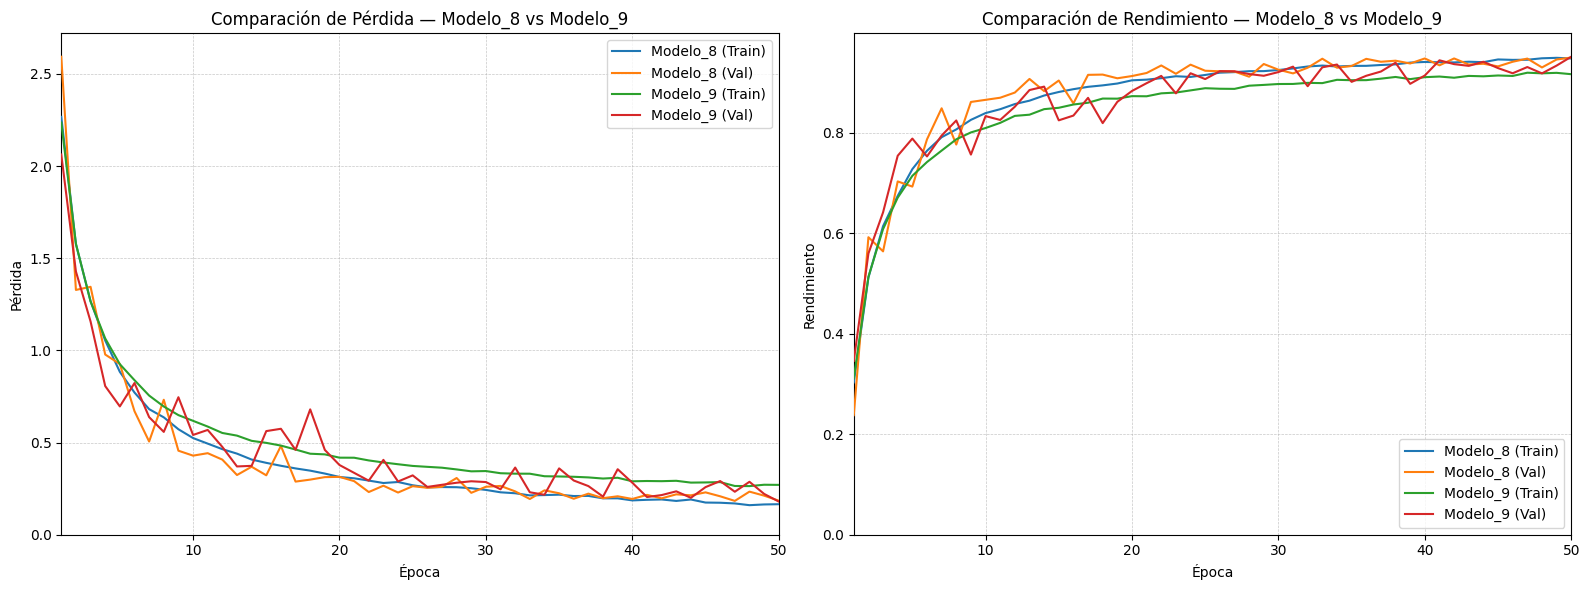

In [ ]:
comparar_modelos(history_8, history_9, 'Modelo_8', 'Modelo_9')

El gráfico de la izquierda muestra la evolución de la pérdida (`loss`) para los conjuntos de entrenamiento y validación de ambos modelos a lo largo de las épocas. En este gráfico, se observa que el modelo 8 (línea `azul` y `naranja`) mantiene una pérdida de entrenamiento significativamente menor (`0.1656`) en comparación con el modelo 9 (línea `verde` y `roja`), que presenta una pérdida de entrenamiento más alta (`0.2704`). Esto indica que el modelo 8 ha aprendido mejor los patrones del conjunto de entrenamiento.

Sin embargo, al analizar la pérdida de validación, el modelo 9 (`0.1799`) mantiene una pérdida ligeramente menor y más estable que el modelo 8 (`0.1846`). Esto sugiere que el modelo 9 tiene una capacidad de generalización ligeramente superior, a pesar de haber aprendido de manera menos efectiva los patrones del entrenamiento.

El gráfico de la derecha, que muestra el rendimiento (`accuracy`), refuerza esta observación. Ambos modelos muestran curvas de precisión similares, pero el modelo 9 (línea `verde` y `roja`) logra mantener una curva de rendimiento más estable en validación, mientras que el modelo 8 presenta mayores fluctuaciones. Aunque el modelo 8 alcanza rápidamente una alta precisión, sus fluctuaciones indican una mayor sensibilidad a las variaciones del conjunto de validación.

### Comparación en Test

In [ ]:
df = comparar_reports(report_8, report_9, 'Modelo 8', 'Modelo 9')
df

Modelo  Accuracy (Test)  Precision (Test)  Recall (Test)  F1-Score (Test)
0  Modelo 8         0.977528          0.978337       0.977617         0.977618
1  Modelo 9         0.961798          0.963611       0.961853         0.962043

Comparando los dos modelos en el conjunto de prueba, el modelo 8 presenta un mejor rendimiento en términos de accuracy (`0.9775`), precisión (`0.9783`), recall (`0.9776`) y F1-Score (`0.9776`), superando al modelo 9, que alcanza un accuracy de prueba de (`0.9618`), una precisión de (`0.9636`), un recall de (`0.9619`) y un F1-Score de (`0.9620`).

Estos resultados indican que, aunque el modelo 9 mostró una mejor capacidad de generalización en validación, su desempeño en el conjunto de prueba es inferior al del modelo 8. Esto sugiere que el modelo 8 ha aprendido mejor los patrones generales de los datos y es más efectivo para clasificar correctamente las imágenes en un entorno no visto.

In [ ]:
all_histories['modelo9'] = history_9
all_models['modelo9'] = best_model_9

## Comparación de Modelos

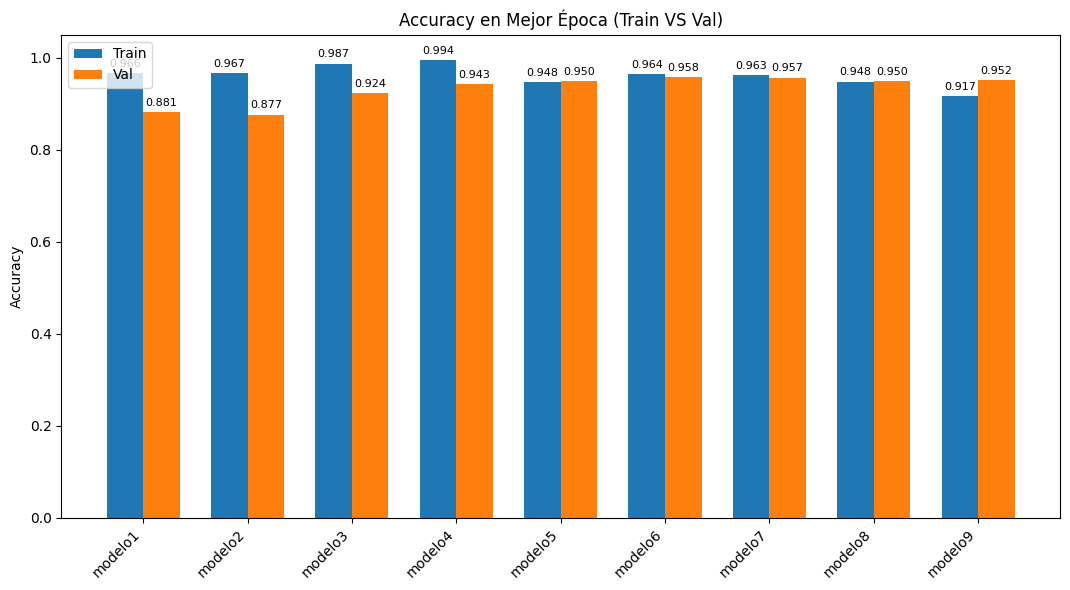

In [ ]:
plot_train_val_accuracy_comparison(all_histories)

El gráfico de barras presenta una comparación del `accuracy` alcanzado por cada uno de los modelos entrenados en sus mejores épocas, diferenciando entre el rendimiento en el conjunto de entrenamiento (`Train`) y el conjunto de validación (`Val`).

### **Análisis General:**
En la mayoría de los modelos, el accuracy en entrenamiento (`barras azules`) es superior al accuracy en validación (`barras naranjas`). Esto es un comportamiento esperado debido al sobreajuste (`overfitting`), donde los modelos aprenden mejor los patrones del conjunto de entrenamiento, pero su capacidad para generalizar a nuevos datos se ve limitada.

Los modelos que presentan la mayor diferencia entre train y val son el `modelo 3` y el `modelo 9`, con una diferencia notable en accuracy:

  - **Modelo 3:** Accuracy en entrenamiento de `0.987` y en validación de `0.924`, lo que indica un cierto grado de sobreajuste.

  - **Modelo 9:** Accuracy en entrenamiento de `0.917` y en validación de `0.952`, una diferencia considerable que refleja la dificultad del modelo para aprender de manera generalizable.

En contraste, los modelos que muestran un mejor equilibrio entre train y val son el `modelo 5`, `modelo 6` y `modelo 7`, con diferencias mínimas entre ambos valores, lo que indica que estos modelos han logrado un mejor balance entre aprendizaje y generalización.

### **Observaciones Individuales:**
- **Modelo 1:** Muestra un buen desempeño con un accuracy de `0.966` en entrenamiento y 0.881 en validación, reflejando una buena capacidad de generalización inicial.

- **Modelo 4:** Aunque presenta un accuracy de entrenamiento muy alto (`0.994`), su accuracy de validación (`0.943`) revela una posible tendencia a sobreajustarse.

- **Modelo 6 y Modelo 7:** Son los que presentan el mejor equilibrio entre entrenamiento y validación, ambos logrando un accuracy muy cercano en ambos conjuntos (`0.964` y `0.958` para el `modelo 6`, `0.963` y `0.957` para el `modelo 7`).

- **Modelo 9:** Es el modelo que muestra la mayor diferencia entre entrenamiento y validación, sugiriendo que, aunque logra generalizar bien, su aprendizaje en entrenamiento no ha sido tan efectivo como en otros modelos.

## Selección del Mejor Modelo

Para este proyecto, se seleccionarán dos modelos destacados en base a dos criterios específicos:





### Mejor Modelo en **VAL_ACCURACY**


Este modelo será el que alcance el mayor `val_accuracy`, lo que indica una mejor capacidad para generalizar a nuevos datos. Se prioriza este modelo porque refleja un desempeño superior al clasificar correctamente las imágenes en el conjunto de validación, lo que garantiza que ha aprendido patrones útiles que se aplican adecuadamente a datos no vistos.


In [ ]:
# 1) Encuentra el mejor modelo
mejor_modelo_nombre = None
mejor_val_accuracy  = -1

print("Buscando el mejor modelo basado en 'val_accuracy' en su mejor época de validación...\n")

if not all_histories:
    print("❌ No hay historiales en all_histories.")
else:
    for name, history in all_histories.items():
        # Asegúrate de tener best_epoch en el history
        if 'best_epoch' in history.history:
            best_epoch = history.history['best_epoch']
        else:
            best_epoch = np.argmax(history.history['val_accuracy']) + 1

        idx = best_epoch - 1
        val_acc = history.history['val_accuracy'][idx]

        if val_acc > mejor_val_accuracy:
            mejor_val_accuracy  = val_acc
            mejor_modelo_nombre = name

    if mejor_modelo_nombre is None:
        print("❌ No se encontró ningún modelo válido.")
    else:
        # 2) Mostrar info del mejor
        best_history = all_histories[mejor_modelo_nombre]
        best_epoch   = best_history.history.get('best_epoch',
                                                np.argmax(best_history.history['val_accuracy']) + 1)
        idx = best_epoch - 1

        print(f"🏆 Mejor modelo: {mejor_modelo_nombre}")
        print(f"    → val_accuracy = {mejor_val_accuracy:.4f}  (Época {best_epoch})\n")

        # 3) Métricas de entrenamiento/validación en esa época
        print("--- Métricas en la Mejor Época (Train vs Val) ---")
        loss     = best_history.history['loss'][idx]
        acc      = best_history.history['accuracy'][idx]
        val_loss = best_history.history['val_loss'][idx]
        val_acc  = best_history.history['val_accuracy'][idx]

        df = pd.DataFrame(
            [[loss, acc, val_loss, val_acc]],
            columns=['Pérdida train', 'Accuracy train', 'Pérdida val', 'Accuracy val'],
            index=[mejor_modelo_nombre]
        ).round(4)
        display(df)

        # 4) Classification Report sobre test
        print(f"\n--- Classification Report en Test para {mejor_modelo_nombre} ---")
        modelo = all_models[mejor_modelo_nombre]
        test_model(modelo, X_test, y_test, model_name=modelo.name, class_names=MAP_CHARACTERS)

Buscando el mejor modelo basado en 'val_accuracy' en su mejor época de validación...

🏆 Mejor modelo: modelo6
    → val_accuracy = 0.9579  (Época 48)

--- Métricas en la Mejor Época (Train vs Val) ---


Pérdida train  Accuracy train  Pérdida val  Accuracy val
modelo6         0.1158          0.9639       0.1759        0.9579


--- Classification Report en Test para modelo6 ---
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

--- Reporte de clasificación para modelo6 ---
                          precision    recall  f1-score   support

  abraham_grampa_simpson     0.9796    1.0000    0.9897        48
  apu_nahasapeemapetilon     0.9804    1.0000    0.9901        50
            bart_simpson     1.0000    0.9600    0.9796        50
charles_montgomery_burns     0.9412    1.0000    0.9697        48
            chief_wiggum     1.0000    1.0000    1.0000        50
          comic_book_guy     1.0000    1.0000    1.0000        49
          edna_krabappel     1.0000    0.9800    0.9899        50
           homer_simpson     1.0000    1.0000    1.0000        50
           kent_brockman     1.0000    0.9600    0.9796        50
        krusty_the_clown     1.0000    1.0000    1.0000        50
            lisa_simpson     0.9608    0.9800    0.9703        50
           marge_simpson     1.0000    1.0000    1.0000        50
   

### Mejor Modelo con **Menor Overfitting**


Este modelo será el que presente la menor diferencia entre el Accuracy de Entrenamiento (`train_accuracy`) y el Accuracy de Validación (`val_accuracy`). Un menor overfitting asegura que el modelo no está simplemente memorizando los patrones del conjunto de entrenamiento, sino que es capaz de aprender de manera generalizable. Esto es crucial para garantizar que el modelo mantenga un rendimiento estable al enfrentarse a nuevos datos.

In [ ]:
# 1) Encuentra el modelo con menor overfitting
mejor_modelo_nombre_overfitting = None
menor_overfitting_diff = float('inf')

print("\nBuscando el modelo con menor overfitting (menor diff Train vs Val accuracy)...")

if not all_histories:
    print("❌ No hay historiales en all_histories.")
else:
    for name, history in all_histories.items():
        # Determina la mejor época (si no se guardó, la calcula)
        best_epoch = history.history.get(
            'best_epoch',
            np.argmax(history.history['val_accuracy']) + 1
        )
        idx = best_epoch - 1

        # Extrae accuracies de train y val en esa época
        train_acc = history.history['accuracy'][idx]
        val_acc   = history.history['val_accuracy'][idx]
        diff = abs(train_acc - val_acc)

        if diff < menor_overfitting_diff:
            menor_overfitting_diff = diff
            mejor_modelo_nombre_overfitting = name

    if mejor_modelo_nombre_overfitting is None:
        print("❌ No se encontró ningún modelo válido para overfitting.")
    else:
        m   = mejor_modelo_nombre_overfitting
        hist = all_histories[m]
        best_epoch = hist.history.get(
            'best_epoch',
            np.argmax(hist.history['val_accuracy']) + 1
        )
        idx = best_epoch - 1
        train_acc = hist.history['accuracy'][idx]
        val_acc   = hist.history['val_accuracy'][idx]

        # 2) Info del modelo
        print(f"\n🏅 Mejor modelo por menor overfitting: {m}")
        print(f"   Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Diff = {menor_overfitting_diff:.4f}")
        print(f"   Ocurrió en época {best_epoch}\n")

        # 3) Métricas en esa época
        print("--- Métricas de Train vs Val en la Mejor Época ---")
        loss     = hist.history['loss'][idx]
        acc      = hist.history['accuracy'][idx]
        val_loss = hist.history['val_loss'][idx]
        val_acc  = hist.history['val_accuracy'][idx]

        df = pd.DataFrame(
            [[loss, acc, val_loss, val_acc]],
            columns=['Pérdida train', 'Accuracy train', 'Pérdida val', 'Accuracy val'],
            index=[m]
        ).round(4)
        display(df)

        # 4) Classification Report en Test
        print(f"\n--- Classification Report en Test para {m} ---")
        model = all_models[m]

        test_model(model, X_test, y_test, model_name=modelo.name, class_names=MAP_CHARACTERS)


Buscando el modelo con menor overfitting (menor diff Train vs Val accuracy)...

🏅 Mejor modelo por menor overfitting: modelo8
   Train Acc = 0.9482, Val Acc = 0.9500, Diff = 0.0018
   Ocurrió en época 50

--- Métricas de Train vs Val en la Mejor Época ---


Pérdida train  Accuracy train  Pérdida val  Accuracy val
modelo8         0.1656          0.9482       0.1846          0.95


--- Classification Report en Test para modelo8 ---
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

--- Reporte de clasificación para modelo6 ---
                          precision    recall  f1-score   support

  abraham_grampa_simpson     1.0000    0.9583    0.9787        48
  apu_nahasapeemapetilon     1.0000    1.0000    1.0000        50
            bart_simpson     0.9600    0.9600    0.9600        50
charles_montgomery_burns     0.9600    1.0000    0.9796        48
            chief_wiggum     1.0000    0.9800    0.9899        50
          comic_book_guy     1.0000    0.9796    0.9897        49
          edna_krabappel     1.0000    0.9400    0.9691        50
           homer_simpson     0.9615    1.0000    0.9804        50
           kent_brockman     0.9796    0.9600    0.9697        50
        krusty_the_clown     0.9804    1.0000    0.9901        50
            lisa_simpson     0.9216    0.9400    0.9307        50
           marge_simpson     1.0000    1.0000    1.0000        50
   

Estos dos modelos serán seleccionados para proporcionar una visión equilibrada entre máximo rendimiento en validación y mejor capacidad de generalización, lo que permite comparar diferentes enfoques y seleccionar el más adecuado para el problema en cuestión.

In [ ]:
def plot_image_grid_with_predictions(model, X, y_true=None, class_names=None, num_rows=3, num_cols=3, figsize=(10,10)):
    """
    Plots a grid of images with model predictions and optionally true labels.

    Parameters:
    -----------
    model : tf.keras.Model
        Trained Keras model for prediction.
    X : array-like
        Array of images to display (shape: [n_samples, height, width, channels]).
    y_true : array-like or None
        True labels, either as integers or one-hot. If None, true labels are omitted.
    class_names : list of str or None
        Names of classes indexed by label. If None, numerical labels are used.
    num_rows : int
        Number of rows in the grid.
    num_cols : int
        Number of columns in the grid.
    figsize : tuple
        Figure size for the plot.
    """
    # Predict probabilities and labels
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Process true labels if provided
    if y_true is not None:
        if y_true.ndim > 1 and y_true.shape[1] > 1:
            y_true_labels = np.argmax(y_true, axis=1)
        else:
            y_true_labels = y_true
    else:
        y_true_labels = None

    plt.figure(figsize=figsize)
    total = num_rows * num_cols
    for i in range(total):
        ax = plt.subplot(num_rows, num_cols, i+1)
        img = X[i]
        # Handle grayscale images
        if img.ndim == 3 and img.shape[2] == 1:
            ax.imshow(img.squeeze(-1), cmap='gray')
        else:
            ax.imshow(img)
        # Build title string
        pred_label = class_names[y_pred[i]] if class_names else str(y_pred[i])
        title = f"Pred: {pred_label}"
        if y_true_labels is not None:
            true_label = class_names[y_true_labels[i]] if class_names else str(y_true_labels[i])
            title += f"\nTrue: {true_label}"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Modelo 6 predicciones

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 374ms/step


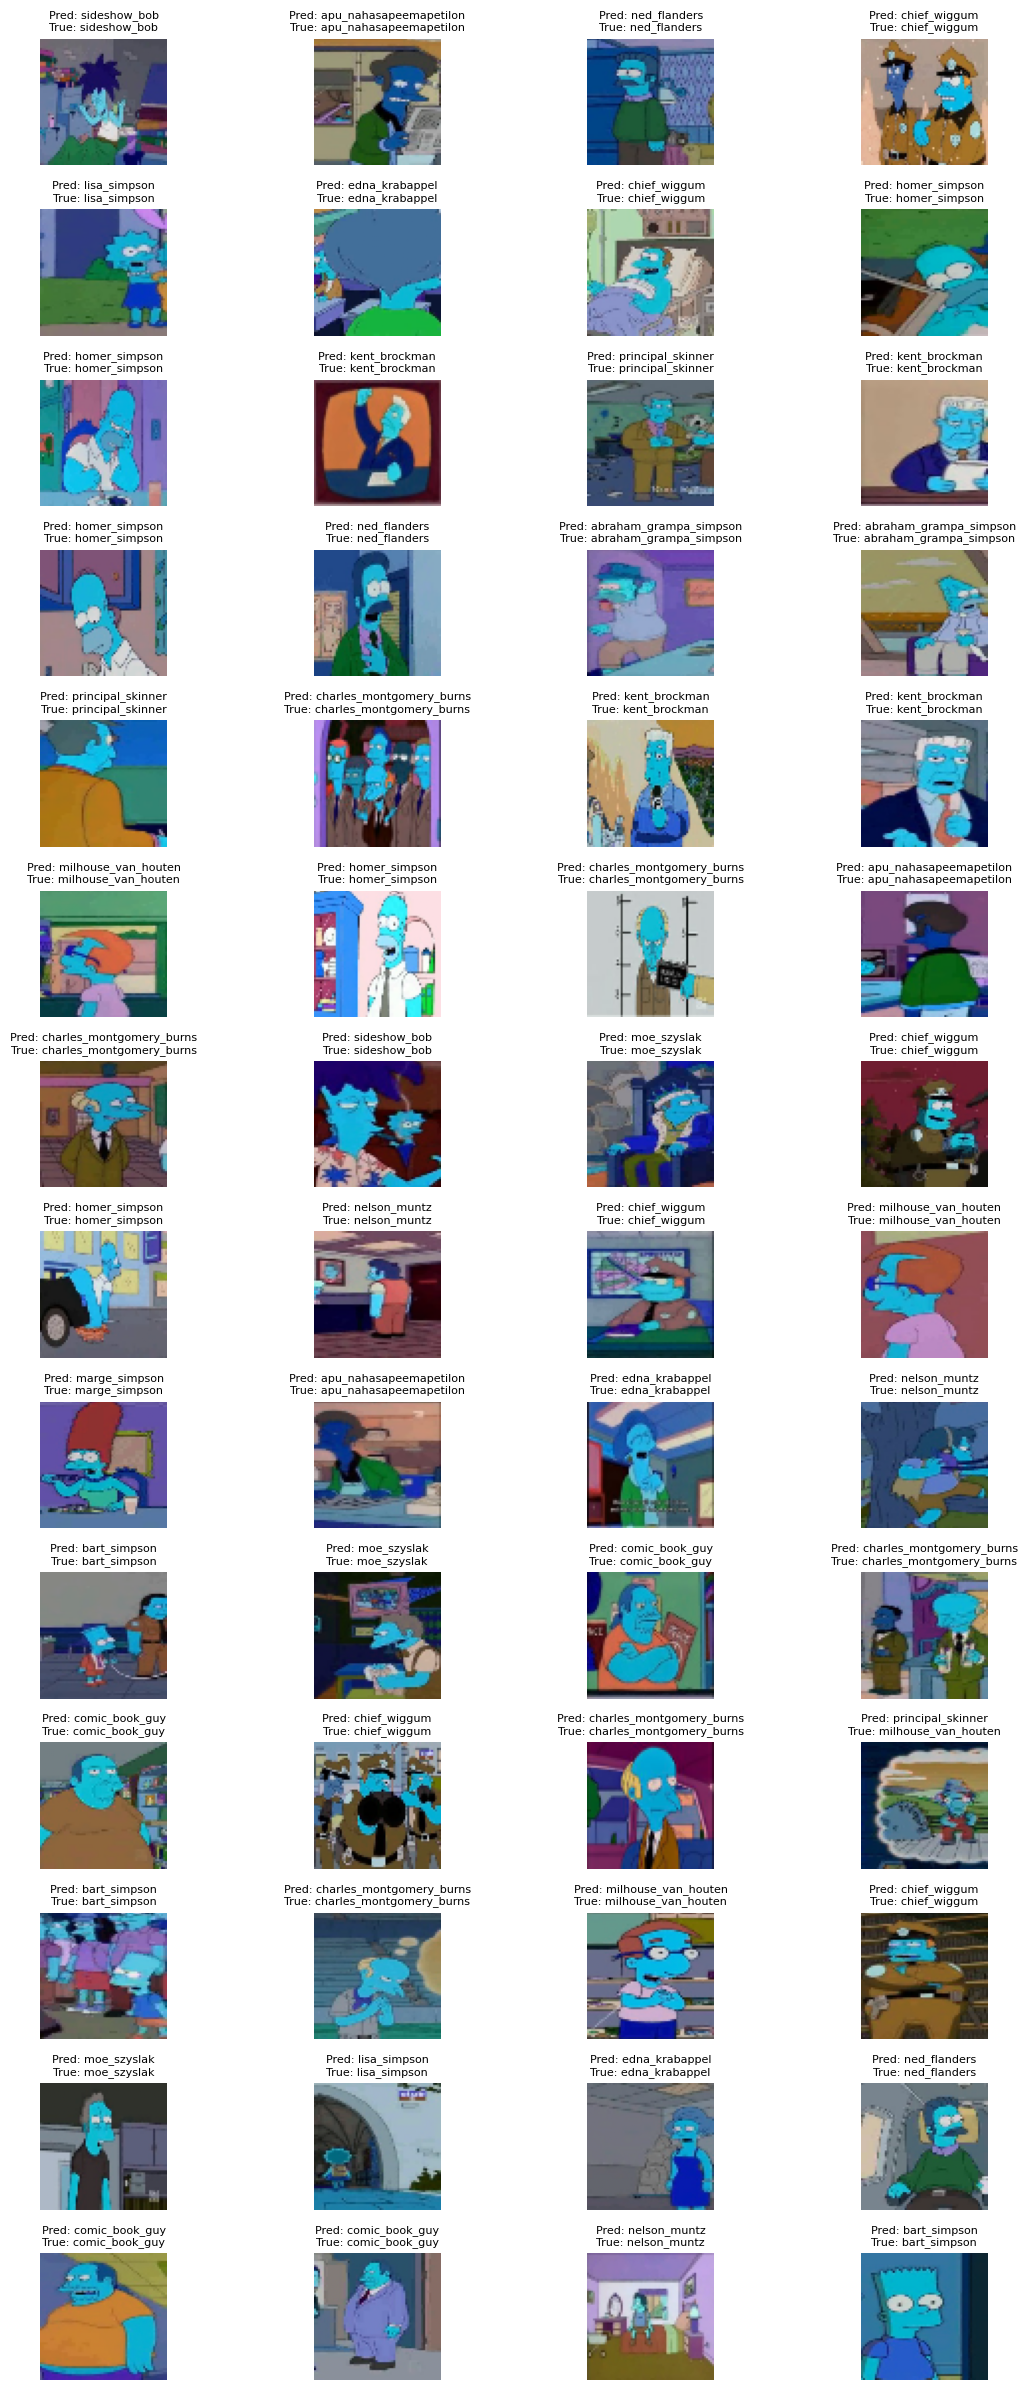

In [ ]:
plot_image_grid_with_predictions(
    modelo,
    X_test,
    y_test,
    class_names=MAP_CHARACTERS,
    num_rows=14,
    num_cols=4,
    figsize=(12, 24)
)


# Modelo 8 predicciones

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 560ms/step


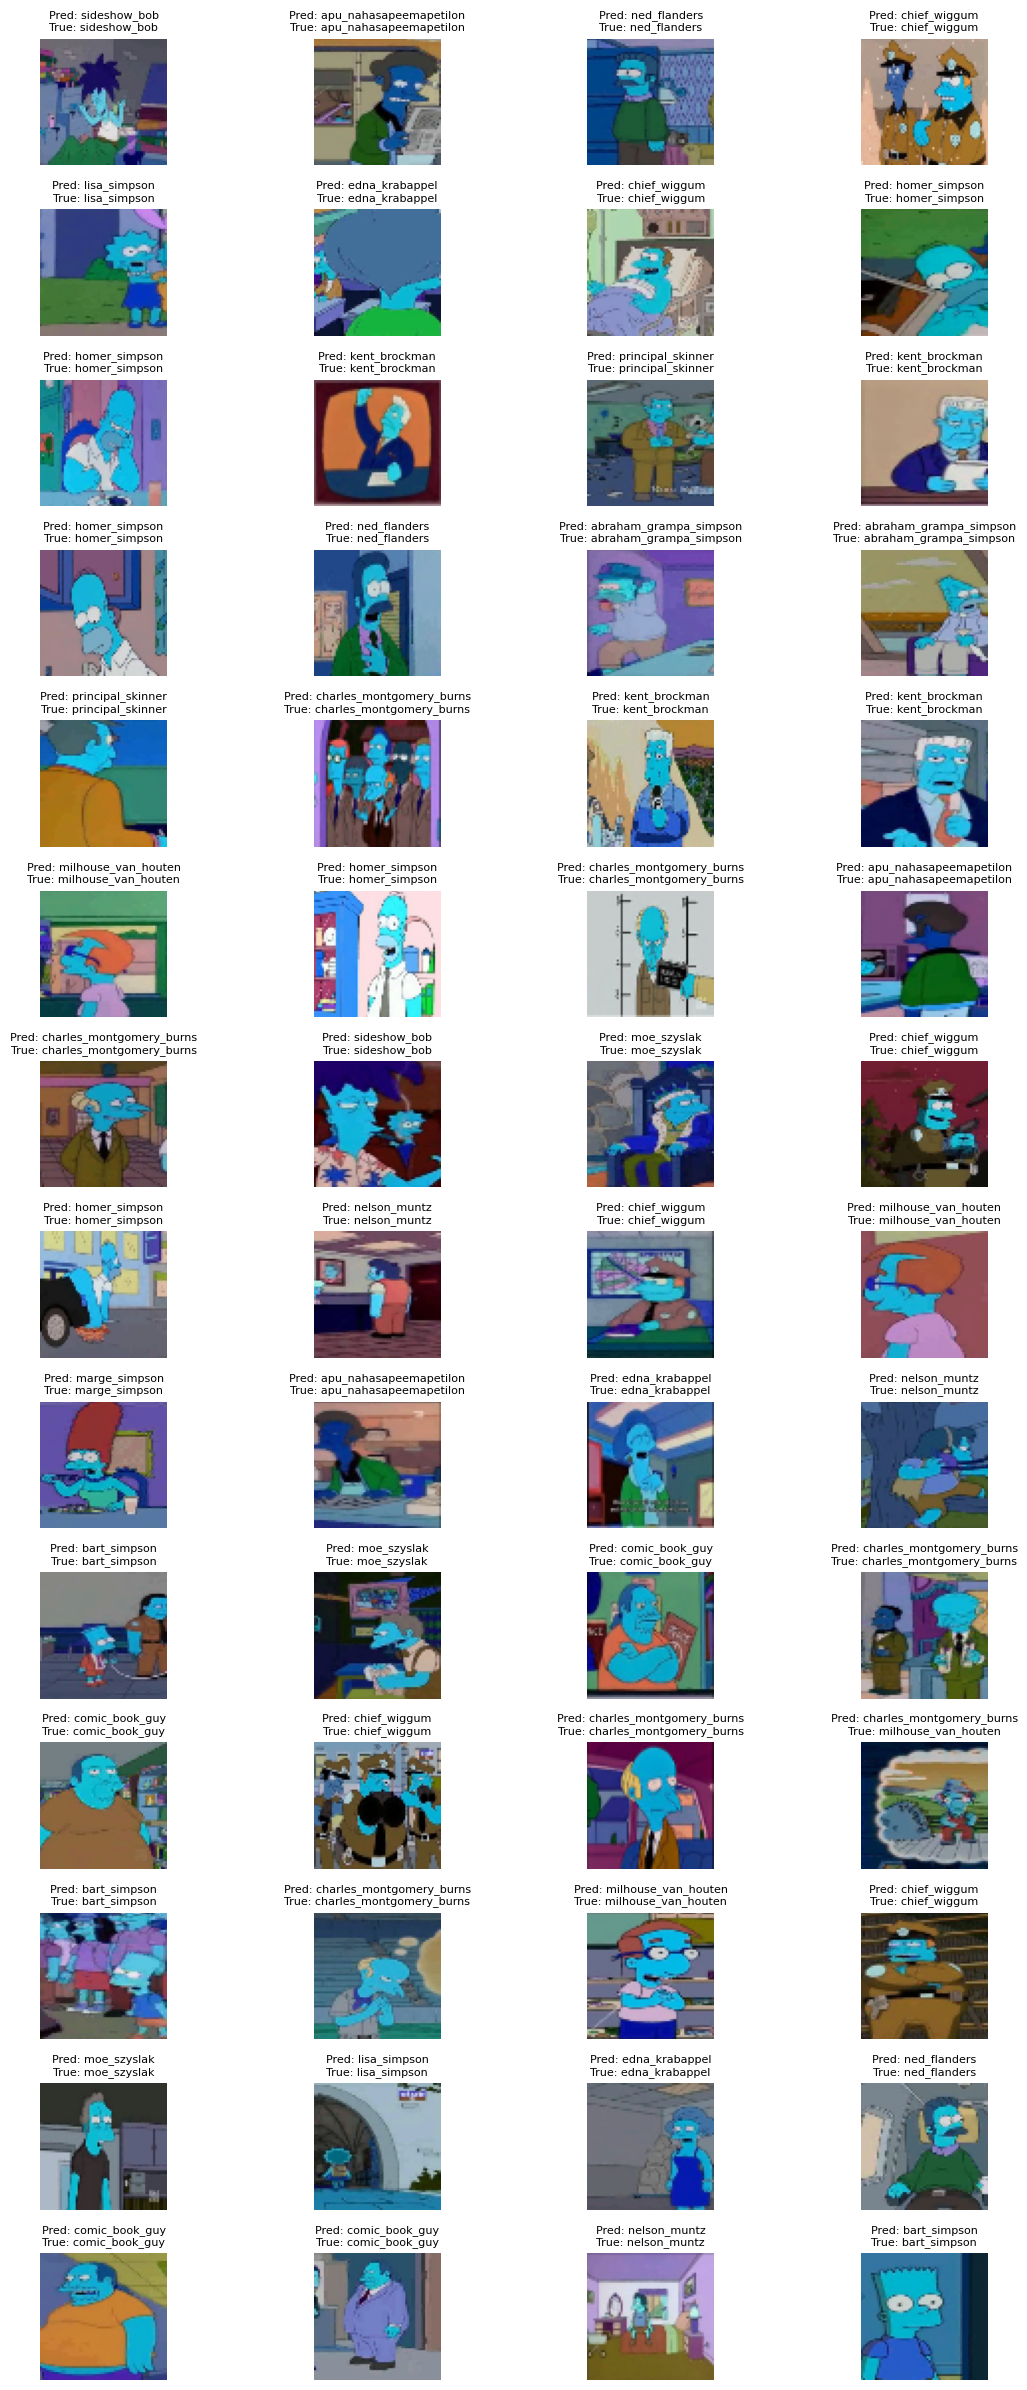

In [ ]:
plot_image_grid_with_predictions(
    model,
    X_test,
    y_test,
    class_names=MAP_CHARACTERS,
    num_rows=14,
    num_cols=4,
    figsize=(12, 24)
)


#Conclusiones

En este proyecto se implementaron diversas estrategias para optimizar el rendimiento de los modelos de clasificación basados en redes neuronales convolucionales (CNN). Una de las técnicas clave fue el uso de Dropout, aplicado tanto en capas densas como en capas convolucionales. En las capas densas, Dropout ayudó a prevenir el sobreajuste al desactivar aleatoriamente neuronas, lo que permitió al modelo aprender patrones más generales. Por otro lado, en las capas convolucionales, Dropout se utilizó para desactivar filtros completos, fortaleciendo la capacidad del modelo para extraer características robustas sin depender de patrones específicos.

Otro componente crucial fue la integración de Batch Normalization, una técnica que estabilizó el entrenamiento al normalizar las activaciones de las capas, reduciendo la variabilidad entre lotes y permitiendo el uso de tasas de aprendizaje más altas. Esta normalización mejoró la estabilidad del entrenamiento y aceleró la convergencia del modelo, evitando problemas relacionados con el "vanishing gradient".

Adicionalmente, se aplicó Data Augmentation exclusivamente en el modelo 9, generando versiones modificadas de las imágenes originales para mejorar la capacidad de generalización. Sin embargo, el modelo entrenado con Data Augmentation presentó un rendimiento inferior en validación y prueba, evidenciando que las transformaciones aplicadas no siempre favorecieron el aprendizaje de patrones generalizables y, en este caso, generaron subajuste, donde el modelo no logró aprender adecuadamente las características clave de las imágenes.

El balance entre Dropout, Batch Normalization y Data Augmentation fue fundamental para alcanzar modelos con un buen equilibrio entre precisión y capacidad de generalización. Los modelos que combinaron adecuadamente estas técnicas lograron un mejor desempeño, evitando tanto el sobreajuste como el subajuste. En conclusión, las estrategias de regularización y normalización aplicadas permitieron mejorar la estabilidad, robustez y rendimiento general de los modelos.